# Imports

In [6]:
import sys
sys.path.append('../')
import numpy as np
from delight.io import *
from delight.utils import *
from delight.photoz_gp import PhotozGP
from delight.photoz_kernels import Photoz_mean_function, Photoz_kernel
from delight.utils_cy import approx_flux_likelihood_cy
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import logging
import coloredlogs
import os

In [7]:
# Plot formatting
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

# Create a logger object.
logger = logging.getLogger(__name__)
coloredlogs.install(level='DEBUG', logger=logger,fmt='%(asctime)s,%(msecs)03d %(programname)s %(name)s[%(process)d] %(levelname)s %(message)s')

# Parameters

In [8]:
FLAG_DC2=True

In [9]:
if FLAG_DC2:
    configfilename='tmp/parametersTest_11.cfg'
    flux_multiplicative_factor=1.
    flux_multiplicative_factor2=1.
    flux_multiplicative_factor=0.45e-10 # factor such if it multiplies data flux in sim gives true data flux
    flux_multiplicative_factor2=0.45e-4 # factor such if it is multiplied to models it gives true data flux level
else:
    configfilename='tmpsim/parametersTest.cfg'
    flux_multiplicative_factor=0.45e-10 # factor such if it multiplies data flux in sim gives true data flux
    flux_multiplicative_factor2=0.45e-4 # factor such if it is multiplied to models it gives true data flux level

# Parse parameters file
params = parseParamFile(configfilename, verbose=False)

In [10]:
# Read filter coefficients, compute normalization of filters
bandCoefAmplitudes, bandCoefPositions, bandCoefWidths, norms\
    = readBandCoefficients(params)
numBands = bandCoefAmplitudes.shape[0]

redshiftDistGrid, redshiftGrid, redshiftGridGP = createGrids(params)
f_mod = readSEDs(params)
DL = approx_DL()

dir_seds = params['templates_directory']
dir_filters = params['bands_directory']
lambdaRef = params['lambdaRef']
sed_names = params['templates_names']
f_mod_grid = np.zeros((redshiftGrid.size, len(sed_names), len(params['bandNames'])))
for t, sed_name in enumerate(sed_names):
    f_mod_grid[:, t, :] = np.loadtxt(dir_seds + '/' + sed_name + '_fluxredshiftmod.txt')

numZbins = redshiftDistGrid.size - 1
numZ = redshiftGrid.size
numConfLevels = len(params['confidenceLevels'])
numObjectsTraining = np.sum(1 for line in open(params['training_catFile']))
numObjectsTarget = np.sum(1 for line in open(params['target_catFile']))
print('Number of Training Objects', numObjectsTraining)
print('Number of Target Objects', numObjectsTarget)

Number of Training Objects 3755
Number of Target Objects 415


/tmp/ipykernel_4537/2765579032.py:21: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  numObjectsTraining = np.sum(1 for line in open(params['training_catFile']))
/tmp/ipykernel_4537/2765579032.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  numObjectsTarget = np.sum(1 for line in open(params['target_catFile']))


# Boucle sur ellPriorSigma

## Initialisation du GP

ellPriorSigma = 1000
Initialisation du GP pour var_C = 1.0, alpha_C = 1000.0
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000


/tmp/ipykernel_4537/3890555783.py:139: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma

/tmp/ipykernel_4537/3890555783.py:126: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, constrained_layout=True)


Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_C) pour ellPriorSigma = 1000


/tmp/ipykernel_4537/3890555783.py:158: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


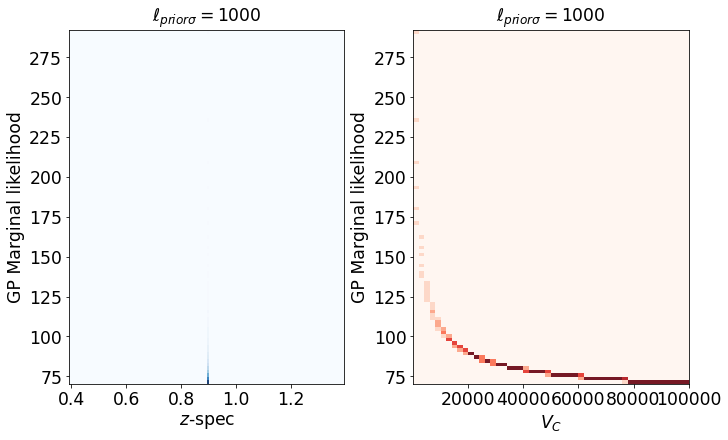

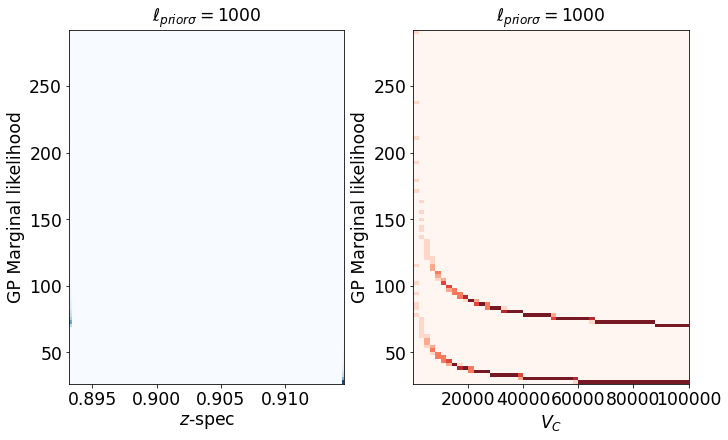

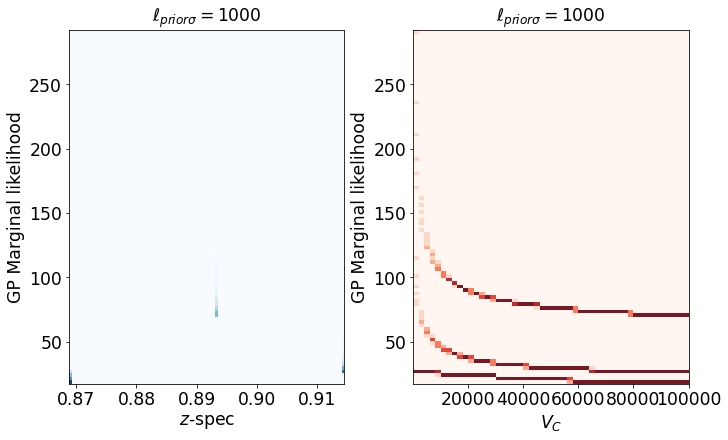

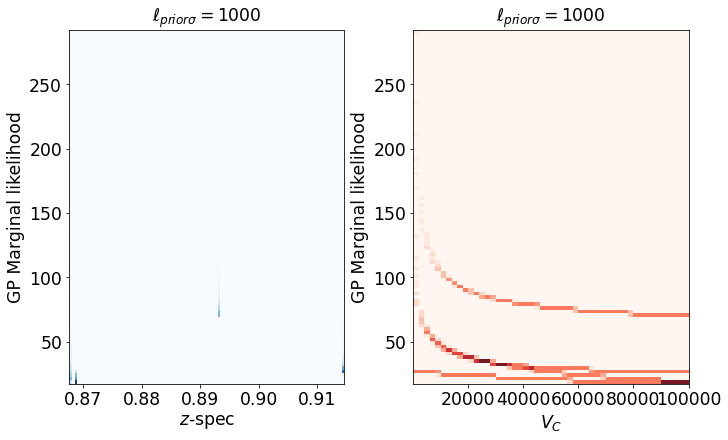

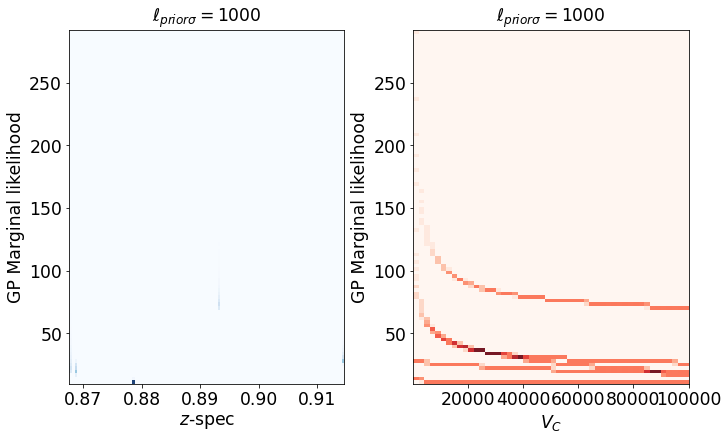

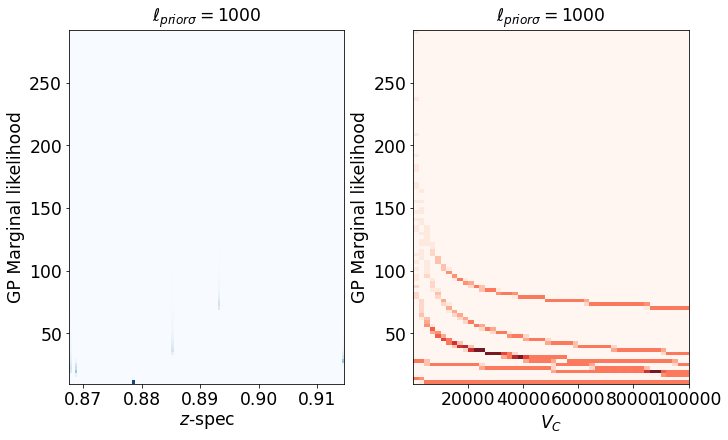

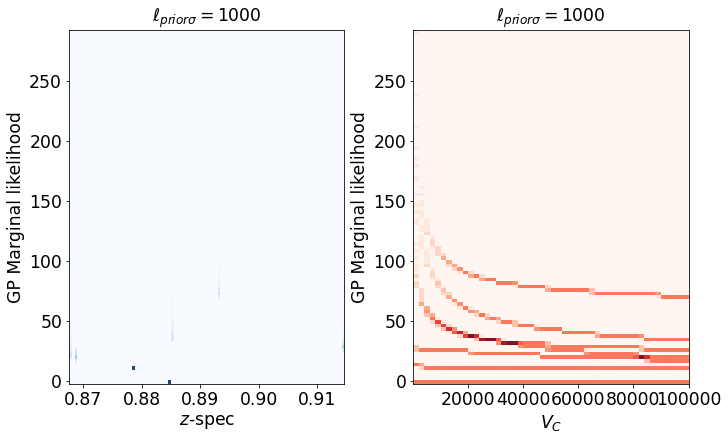

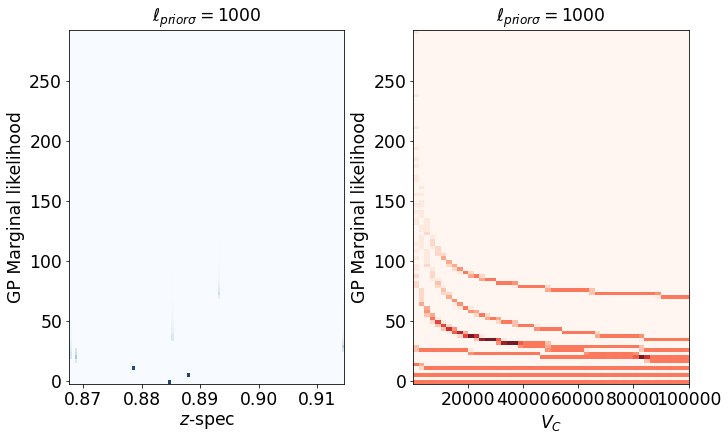

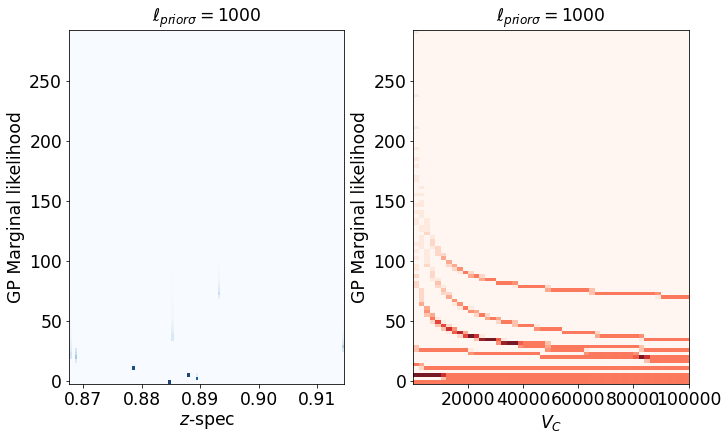

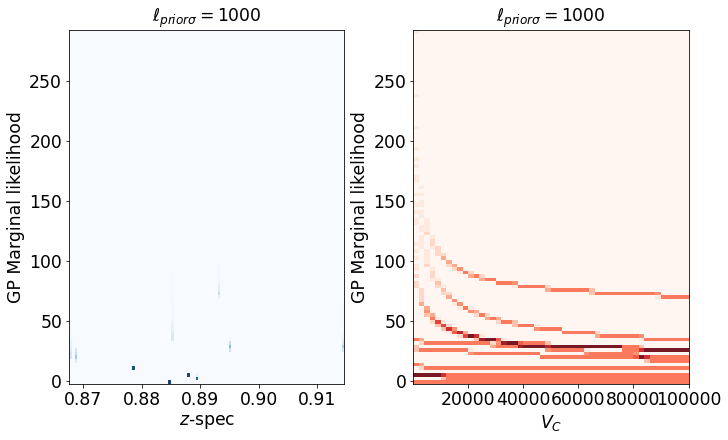

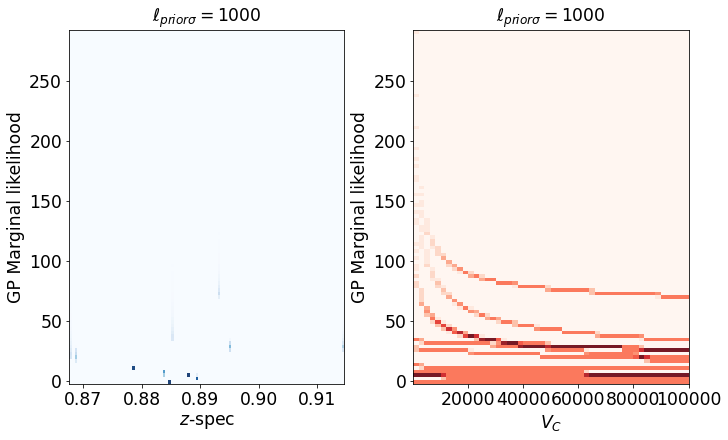

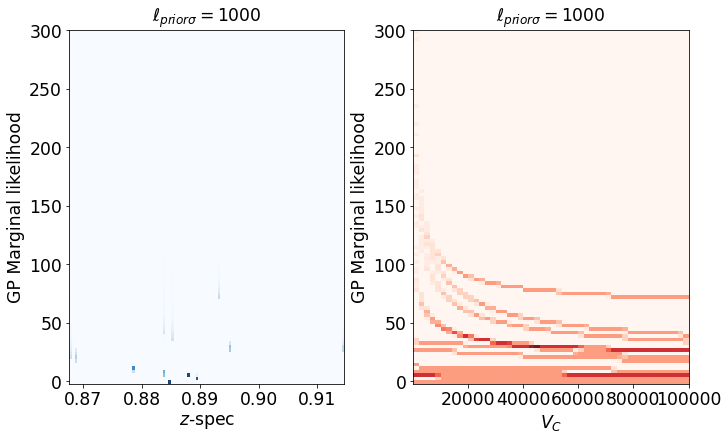

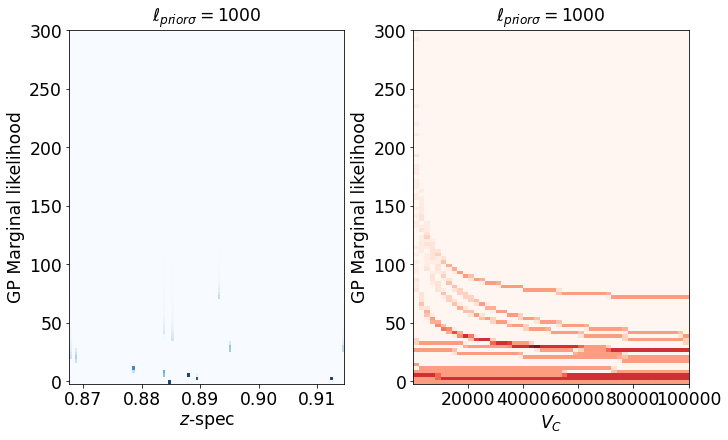

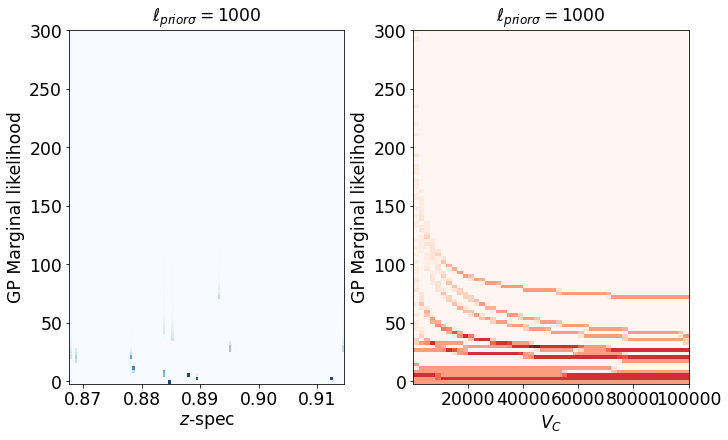

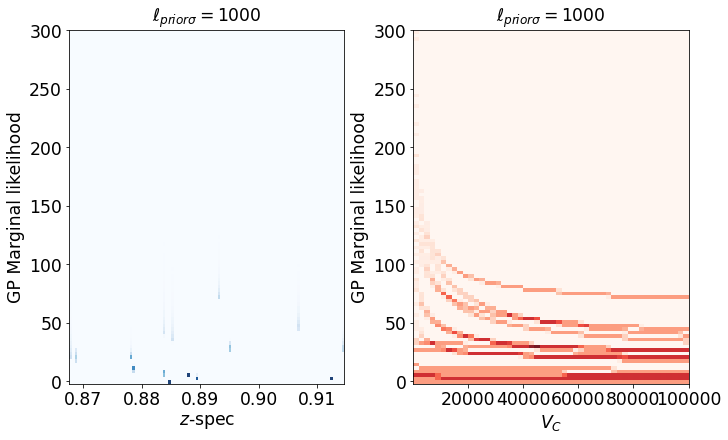

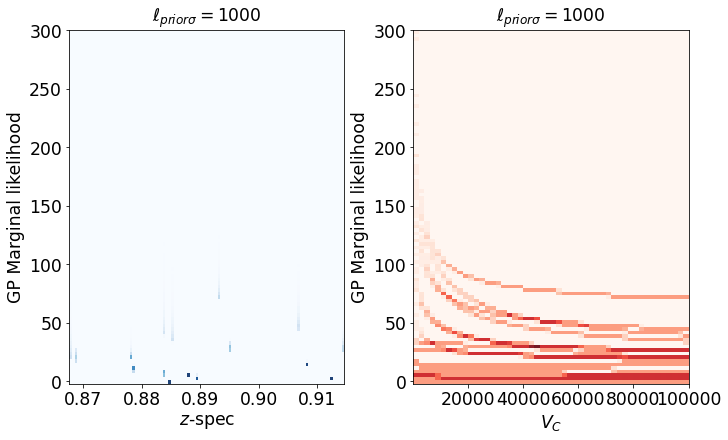

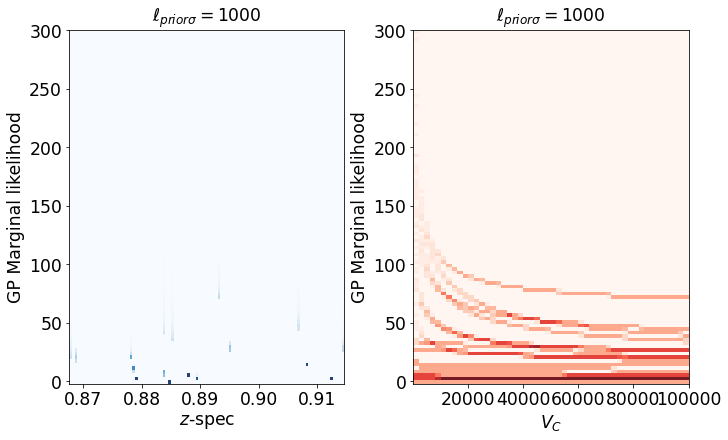

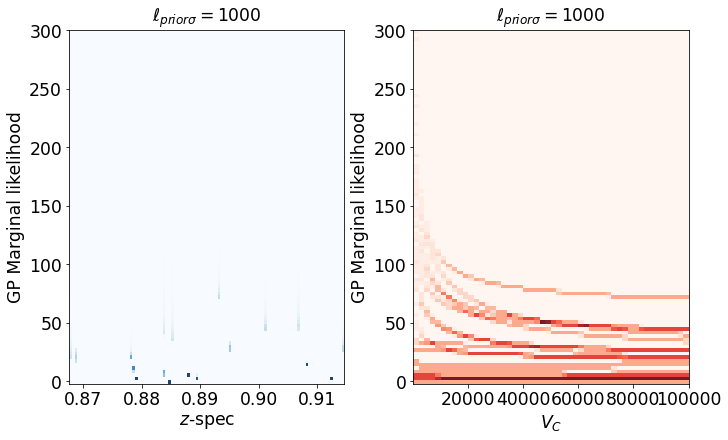

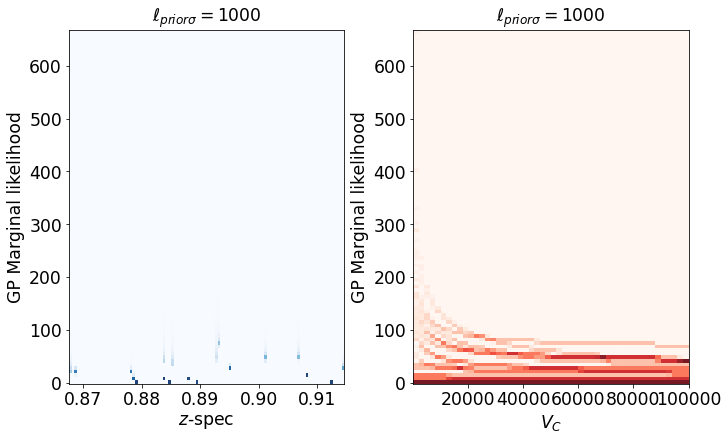

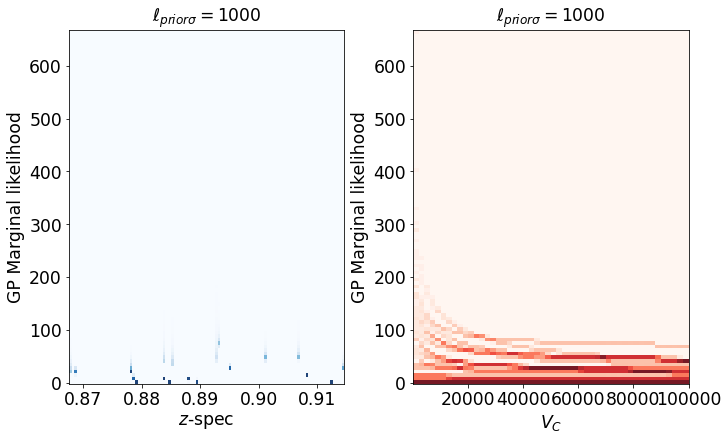

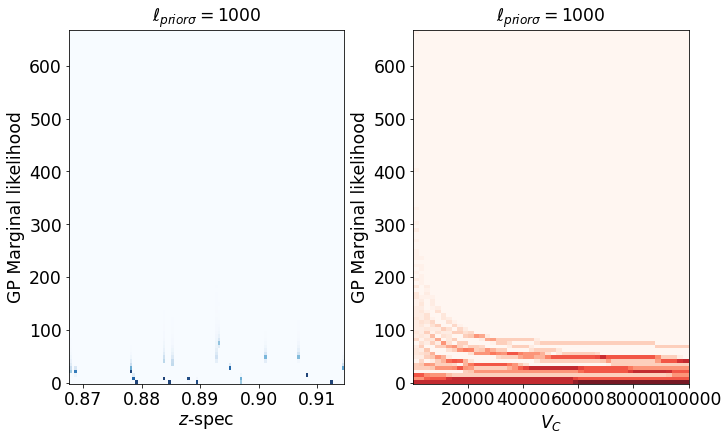

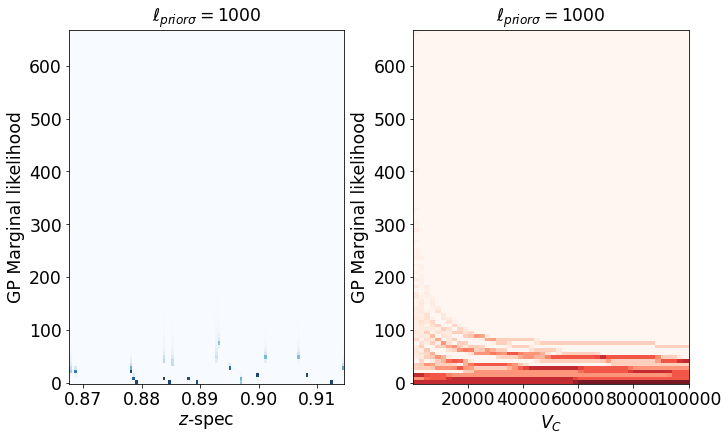

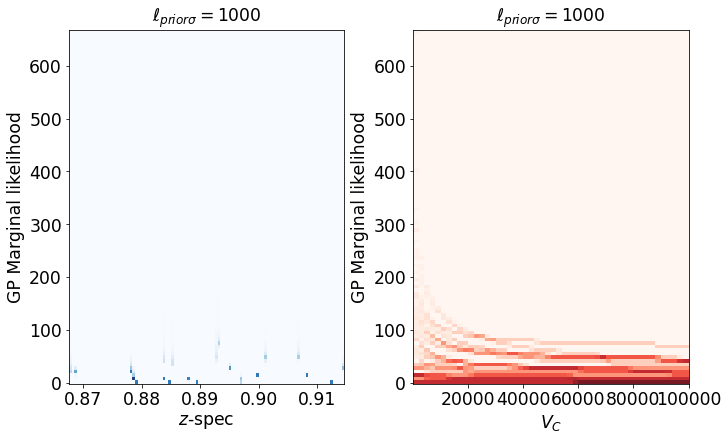

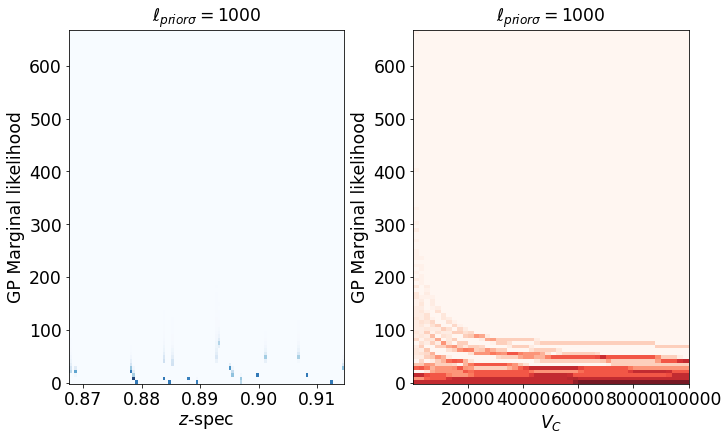

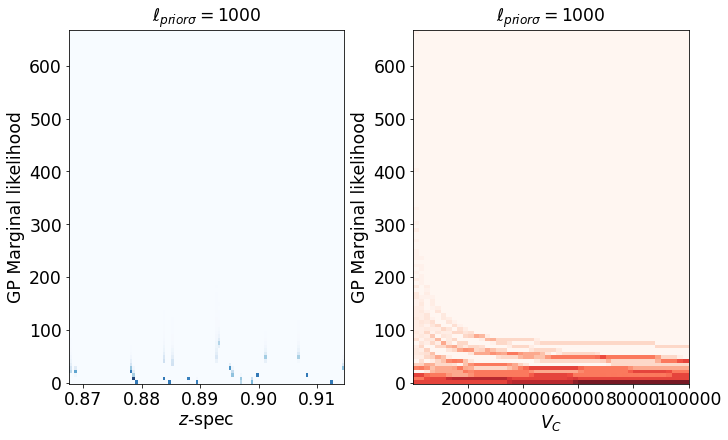

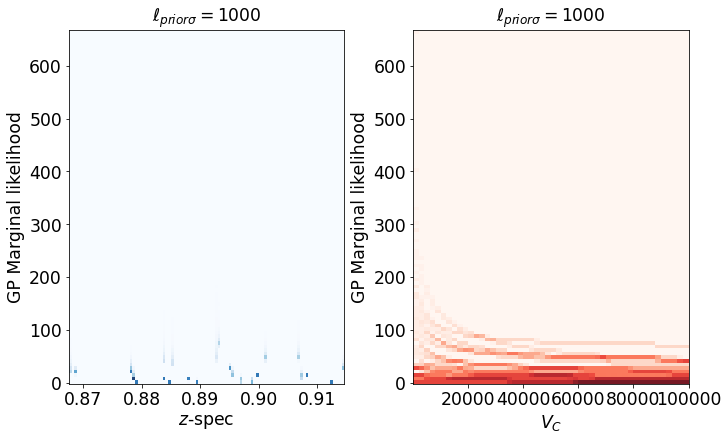

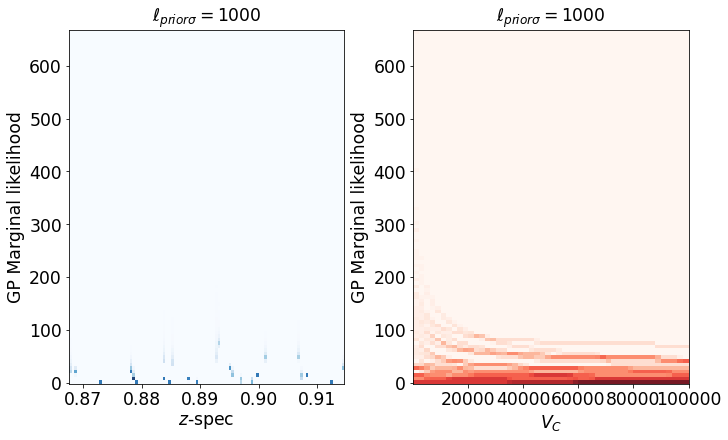

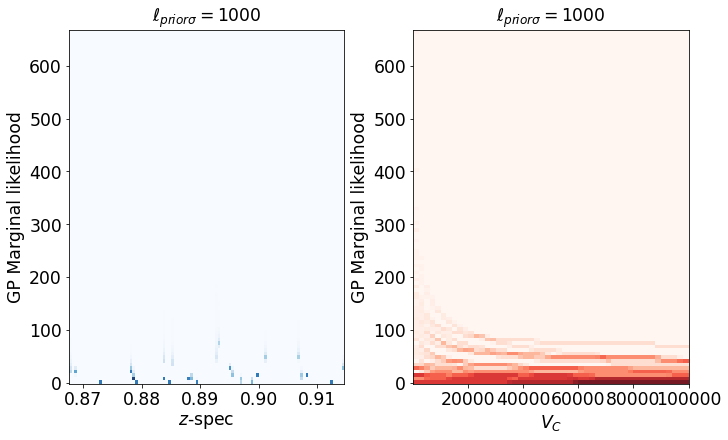

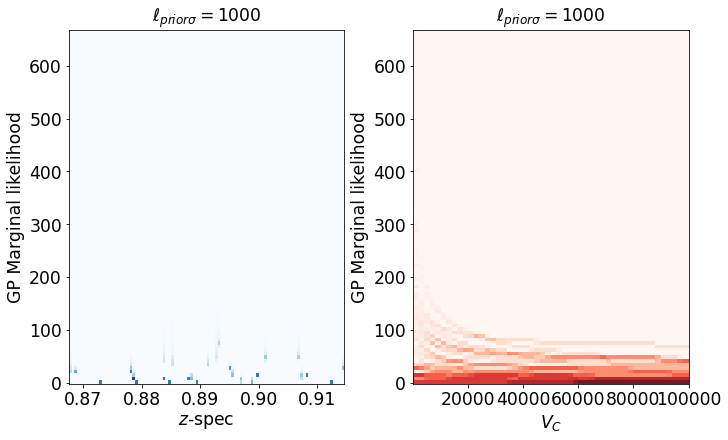

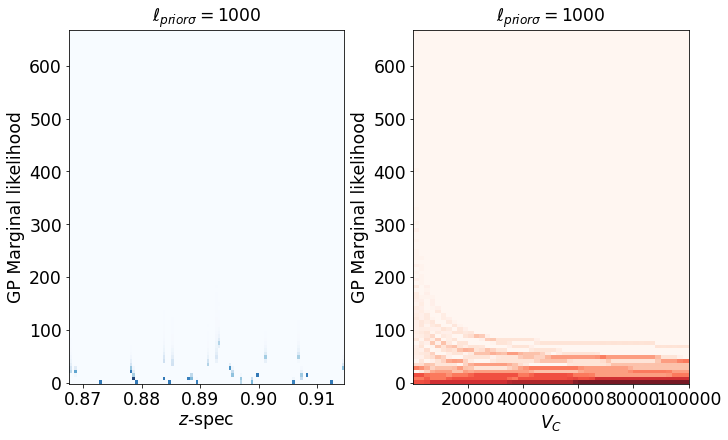

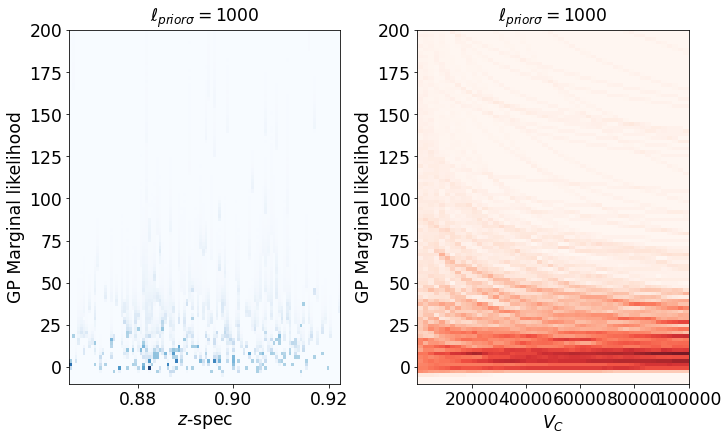

In [11]:
ellPriorSigmaList = np.logspace( 0, 6, 7 )
lenSigList = len(ellPriorSigmaList)
ellInd = -1

for ellPriorSigma in [1000]: #ellPriorSigmaList:
    print("ellPriorSigma = {}".format(ellPriorSigma))
    ellInd += 1
    alpha_C = 1e3
    alpha_L = 1e2
    V_C, V_L = 1.0, 1.0
    allVc = []
    allZ = []
    allMargLike = []
    allAlphaC = []
    allAlphaL = []
    allVl = []
    gp = PhotozGP(
        f_mod,
        bandCoefAmplitudes, bandCoefPositions, bandCoefWidths,
        params['lines_pos'], params['lines_width'],
        V_C, V_L, alpha_C, alpha_L,
        redshiftGridGP, use_interpolators=True)
    print("Initialisation du GP pour var_C = {}, alpha_C = {}".format(gp.kernel.var_C, gp.kernel.alpha_C))

    for extraFracFluxError in [1e-2]:
        redshifts = np.zeros((numObjectsTarget, ))
        bestTypes = np.zeros((numObjectsTarget, ), dtype=int)
        ellMLs = np.zeros((numObjectsTarget, ))
        model_mean = np.zeros((numZ, numObjectsTarget, numBands))
        model_covar = np.zeros((numZ, numObjectsTarget, numBands))
        # params['training_extraFracFluxError'] = extraFracFluxError
        params['target_extraFracFluxError'] = extraFracFluxError
        
        # ~ trainingDataIter = getDataFromFile(params, TR_firstLine, TR_lastLine,prefix="training_", ftype="gpparams")

        # ~ # loop on training data to load the GP parameter
        # ~ for loc, (z, ell, bands, X, B, flatarray) in enumerate(trainingDataIter):
            # ~ t1 = time()
            # ~ redshifts[loc] = z              # redshift of all training samples
            # ~ gp.setCore(X, B, nt,flatarray[0:nt+B+B*(B+1)//2])
            # ~ bestTypes[loc] = gp.bestType   # retrieve the best-type found by delight-learn
            # ~ ells[loc] = ell                # retrieve the luminosity parameter l

            # ~ # here is the model prediction of Gaussian Process for that particular trainning galaxy
            # ~ model_mean[:, loc, :], model_covar[:, loc, :] = gp.predictAndInterpolate(redshiftGrid, ell=ell)
            # ~ t2 = time()
            # ~ # print(loc, t2-t1)

        # ~ #Redshift prior on training galaxy
        # ~ # p_t = params['p_t'][bestTypes][None, :]
        # ~ # p_z_t = params['p_z_t'][bestTypes][None, :]
        # ~ # compute the prior for taht training sample
        # ~ prior = np.exp(-0.5*((redshiftGrid[:, None]-redshifts[None, :]) /params['zPriorSigma'])**2)
        # ~ # prior[prior < 1e-6] = 0
        # ~ # prior *= p_t * redshiftGrid[:, None] *
        # ~ # np.exp(-0.5 * redshiftGrid[:, None]**2 / p_z_t) / p_z_t

        # ~ if params['useCompression'] and params['compressionFilesFound']:
            # ~ fC = open(params['compressMargLikFile'])
            # ~ fCI = open(params['compressIndicesFile'])
            # ~ itCompM = itertools.islice(fC, firstLine, lastLine)
            # ~ iterCompI = itertools.islice(fCI, firstLine, lastLine)
        
#        targetDataIter = getDataFromFile(params, firstLine, lastLine,prefix="target_", getXY=False, CV=False)
#        for loc, (z, normedRefFlux, bands, fluxes, fluxesVar, bCV, dCV, dVCV) in enumerate(targetDataIter):
#            ell_hat_z = normedRefFlux * 4 * np.pi * params['fluxLuminosityNorm'] * (DL(redshiftGrid)**2. * (1+redshiftGrid))
            #ell_hat_z[:] = 1
#            if params['useCompression'] and params['compressionFilesFound']:
#                indices = np.array(next(iterCompI).split(' '), dtype=int)
#                sel = np.in1d(targetIndices, indices, assume_unique=True)
#                # same likelihood as for template fitting
#                like_grid = approx_flux_likelihood(fluxes,fluxesVar,model_mean[:, sel, :][:, :, bands],
#                    f_mod_covar=model_covar[:, sel, :][:, :, bands],
#                    marginalizeEll=True, normalized=False,
#                    ell_hat=ell_hat_z,
#                    ell_var=(ell_hat_z*params['ellPriorSigma'])**2)
#                like_grid *= prior[:, sel]
#            else:
#                like_grid = np.zeros((nz, model_mean.shape[1]))
#                # same likelihood as for template fitting, but cython
#                approx_flux_likelihood_cy(
#                    like_grid, nz, model_mean.shape[1], bands.size,
#                    fluxes, fluxesVar,  # target galaxy fluxes and variance
#                    model_mean[:, :, bands],     # prediction with Gaussian process
#                    model_covar[:, :, bands],
#                    ell_hat=ell_hat_z,           # it will find internally the ell
#                    ell_var=(ell_hat_z*params['ellPriorSigma'])**2)
#                like_grid *= prior[:, :] #likelihood multiplied by redshift training galaxies priors

        loc = -1
        targetDataIter = getDataFromFile(params, 0, numObjectsTraining, prefix="target_", getXY=True)
        for z, normedRefFlux, bands, fluxes, fluxesVar, bCV, fCV, fvCV, X, Y, Yvar in targetDataIter:
            loc += 1
            redshifts[loc] = z
            # print( "z = {},\nbands = {},\nfluxes = {}".format(z, bands, fluxes) )

            themod = np.zeros((1, f_mod_grid.shape[1], bands.size))
            for it in range(f_mod_grid.shape[1]):
                for ib, band in enumerate(bands):
                    themod[0, it, ib] = np.interp(z, redshiftGrid, f_mod_grid[:, it, band])

            chi2_grid, theellMLs = scalefree_flux_likelihood(fluxes, fluxesVar, themod, returnChi2=True)

            bestTypes[loc] = np.argmin(chi2_grid)
            #distribué uniformément?
            ellMLs[loc] = theellMLs[0, bestTypes[loc]]
            #autour de 1e6 car facteur dans la génération des flux

            X[:, 2] = ellMLs[loc]

            for V_C in np.linspace(0.1, 1e5, 300):
                gp.kernel.use_interpolators=False
                gp.kernel.var_C = V_C
                #gp.kernel.update_kernelparts(X)
                gp.setData(X, Y, Yvar, bestTypes[loc])
                marginalLikelihood = gp.margLike()
                allZ.append(z)
                allMargLike.append(marginalLikelihood)
                allVc.append(V_C)

            if loc < 30:
                ## Plot for this iteration on ellPriorSigma:
                print("Création des graphes Marglike=f(V_C) pour ellPriorSigma = {}".format(ellPriorSigma))
                alpha = 0.9
                s = 5
                fig, axs = plt.subplots(1, 2, constrained_layout=True)

                vs0 = axs[0].hist2d(allZ, allMargLike, bins=[100, 100], density=True, cmap="Blues", alpha=alpha)
                vs1 = axs[1].hist2d(allVc, allMargLike, bins=[50, 100], density=True, cmap="Reds", alpha=alpha)

                axs[0].set_xlabel('$z$-spec')
                axs[0].set_ylabel('GP Marginal likelihood')
                axs[1].set_xlabel('$V_C$')
                axs[1].set_ylabel('GP Marginal likelihood')

                axs[0].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))
                axs[1].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))

                fig.show()

    ## Plot for this iteration on ellPriorSigma:
    print("Création des graphes Marglike=f(V_C) pour ellPriorSigma = {}".format(ellPriorSigma))
    alpha = 0.9
    s = 5
    fig, axs = plt.subplots(1, 2, constrained_layout=True)

    vs0 = axs[0].hist2d(allZ, allMargLike, bins=[100, 100], range=[[np.min(allZ), np.max(allZ)], [-10, 200]], density=True, cmap="Blues", alpha=alpha)
    vs1 = axs[1].hist2d(allVc, allMargLike, bins=[50, 100], range=[[np.min(allVc), np.max(allVc)], [-10, 200]], density=True, cmap="Reds", alpha=alpha)

    axs[0].set_xlabel('$z$-spec')
    axs[0].set_ylabel('GP Marginal likelihood')
    axs[1].set_xlabel('$V_C$')
    axs[1].set_ylabel('GP Marginal likelihood')

    axs[0].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))
    axs[1].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))

    fig.show()

    if FLAG_DC2:
        fig.savefig( "VC_MargLike_z_v3_DESC_ellSigma-{}_target.png".format(ellPriorSigma) )
    else:
        fig.savefig( "VC_MargLike_z_v3_SIM_ellSigma-{}_target.png".format(ellPriorSigma) )

## Loop on V_L to compute marginal likelihood, for each training object

ellPriorSigma = 1000
Initialisation du GP pour var_C = 100000, alpha_C = 1000.0
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000


/tmp/ipykernel_4537/792339656.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma

/tmp/ipykernel_4537/792339656.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, constrained_layout=True)


Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(V_L) pour ellPriorSigma = 1000


/tmp/ipykernel_4537/792339656.py:101: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


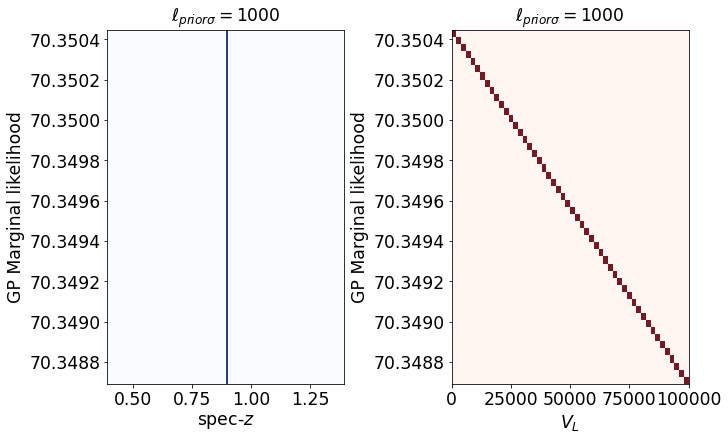

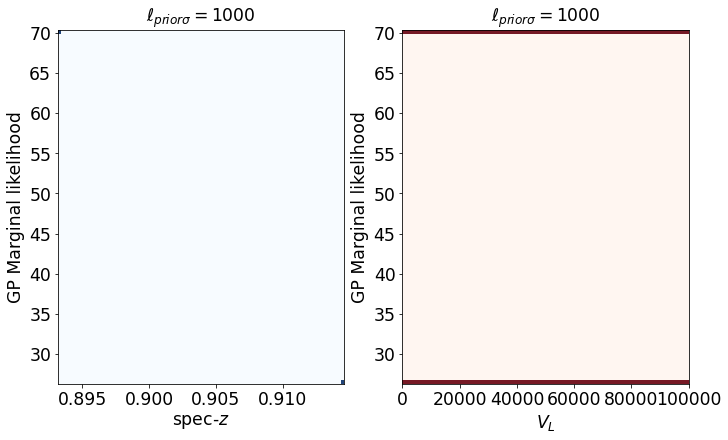

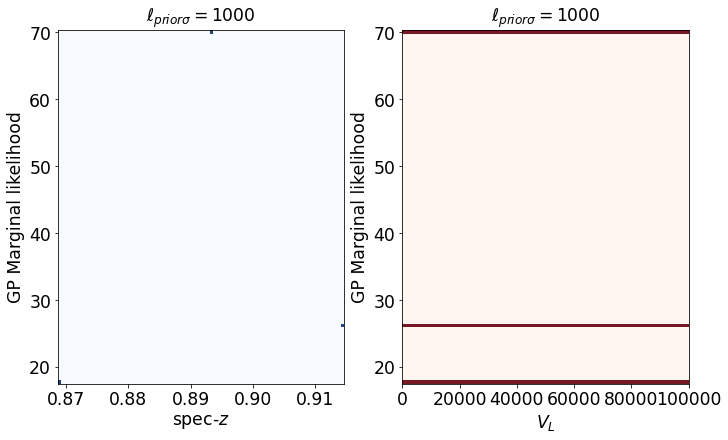

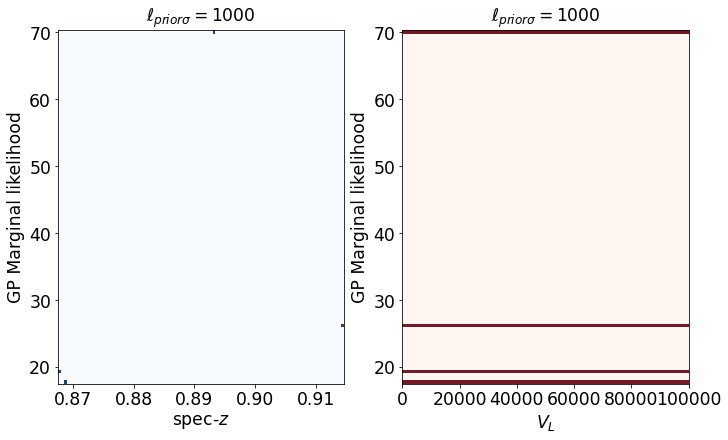

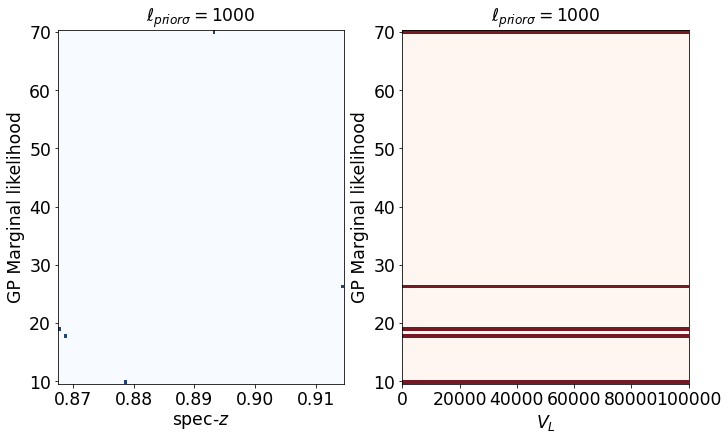

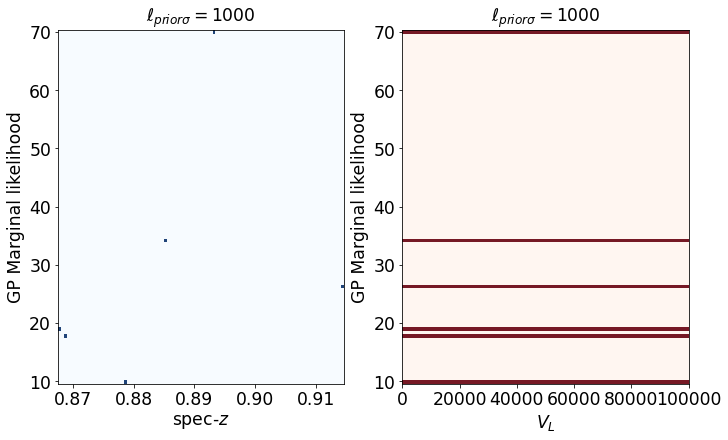

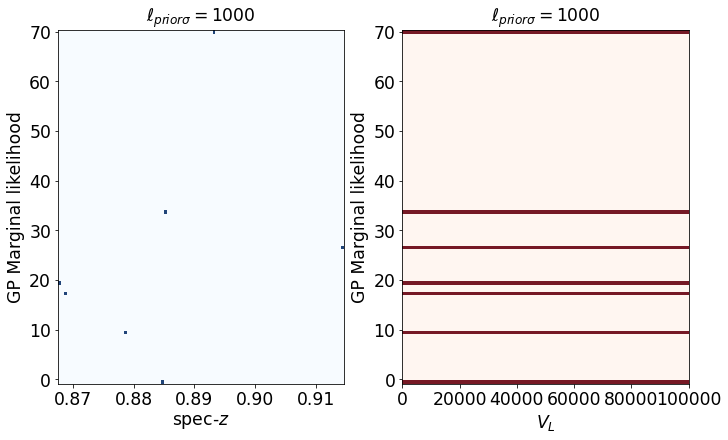

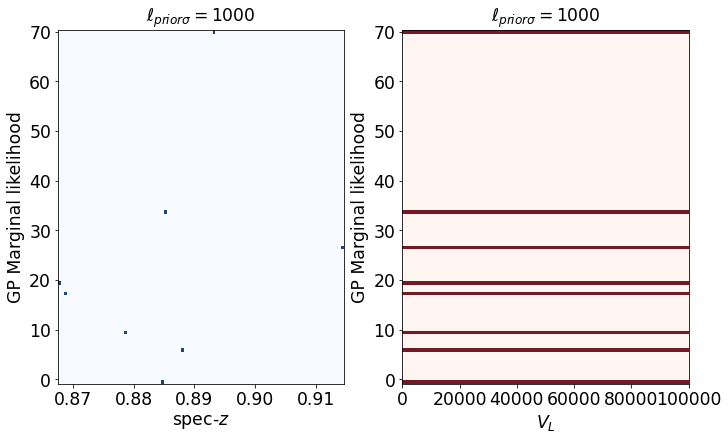

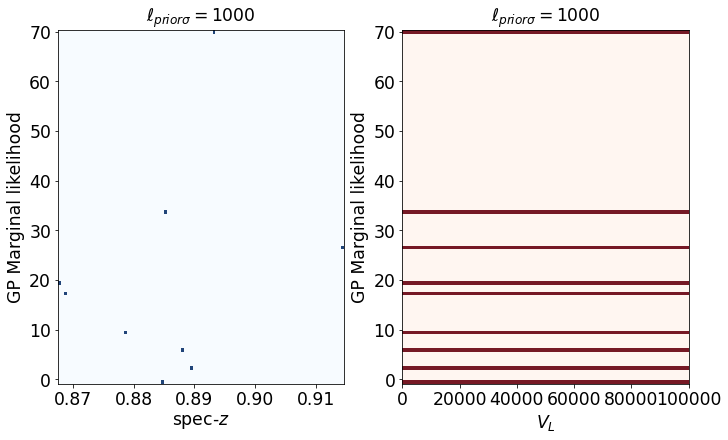

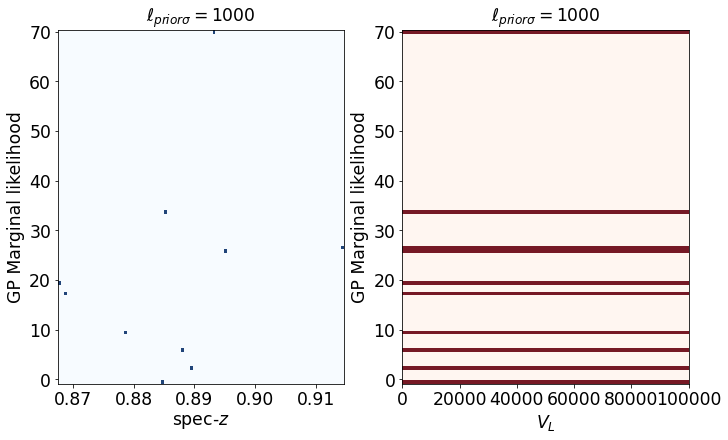

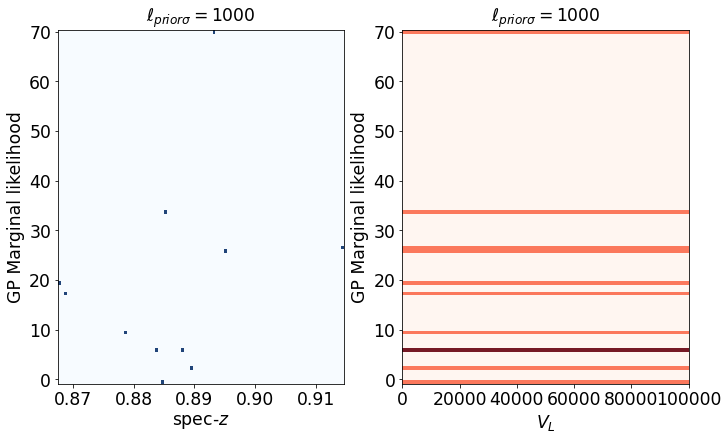

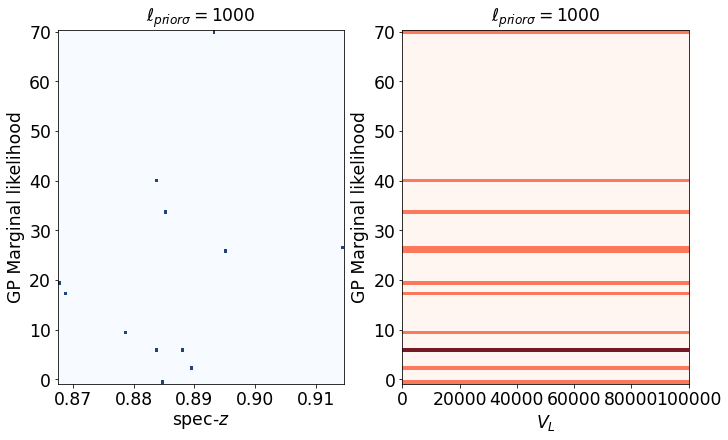

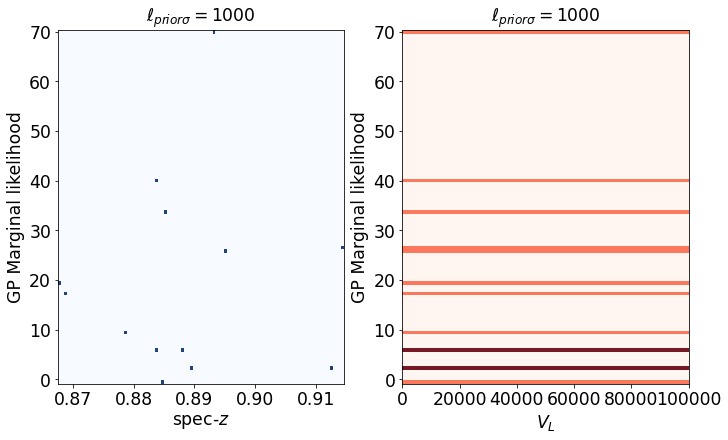

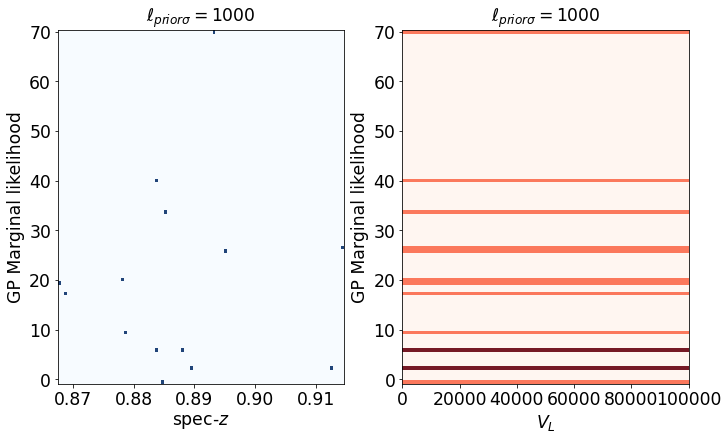

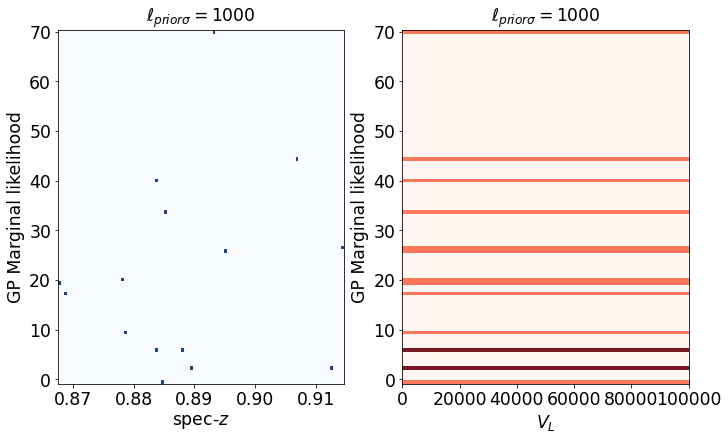

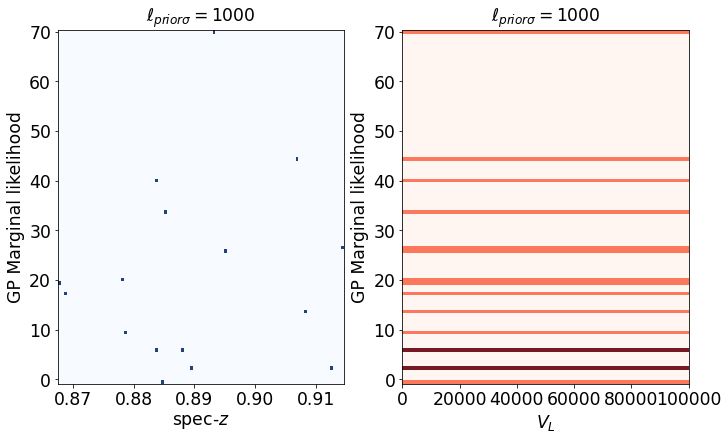

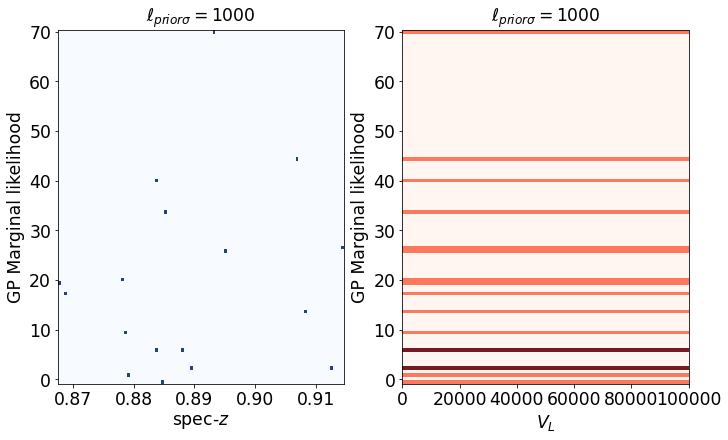

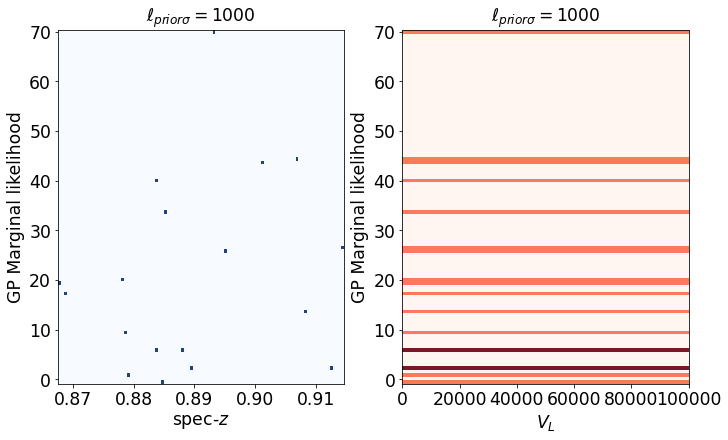

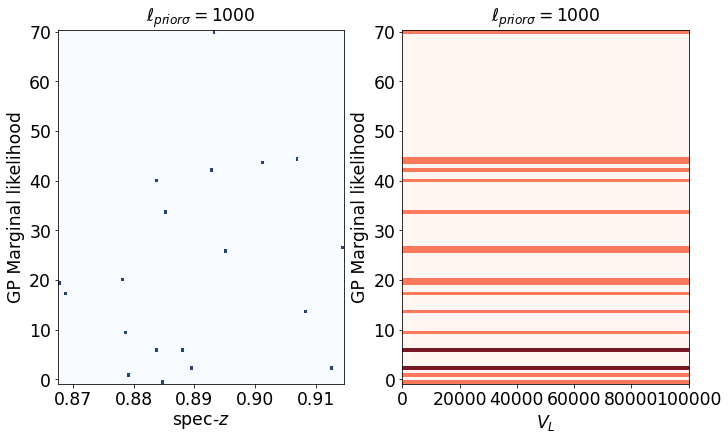

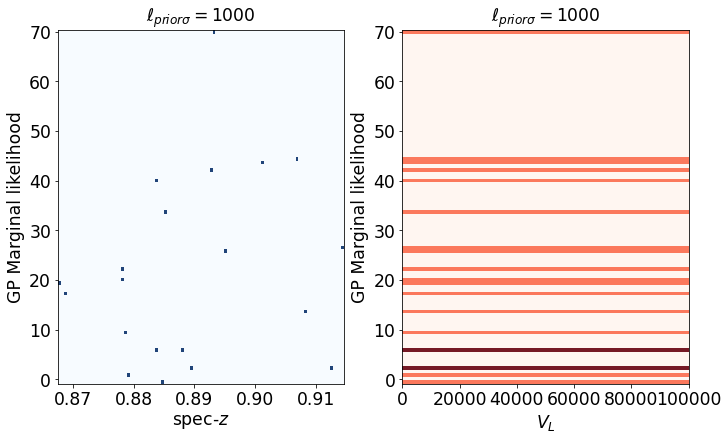

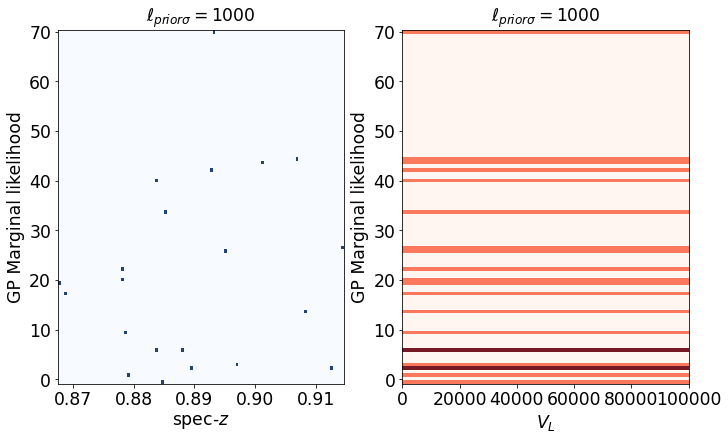

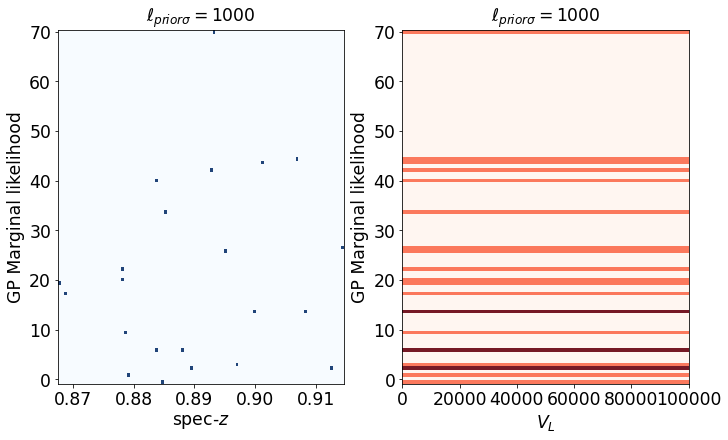

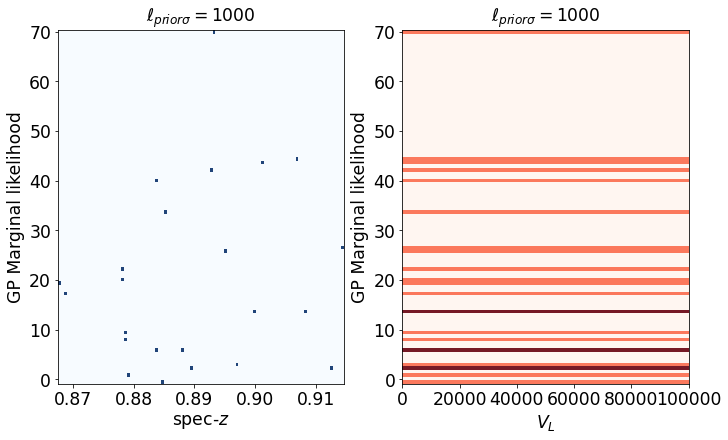

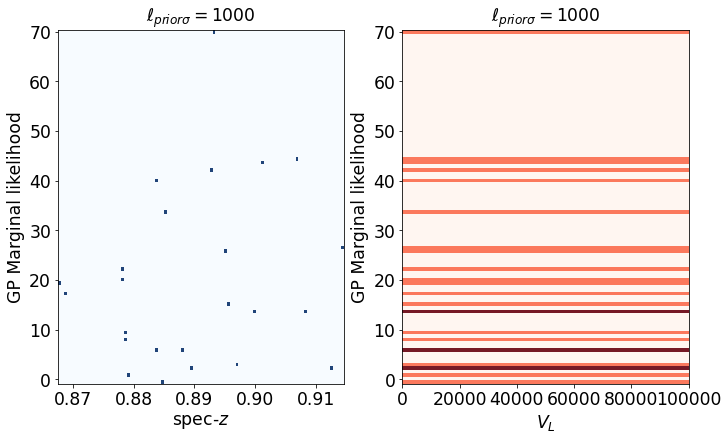

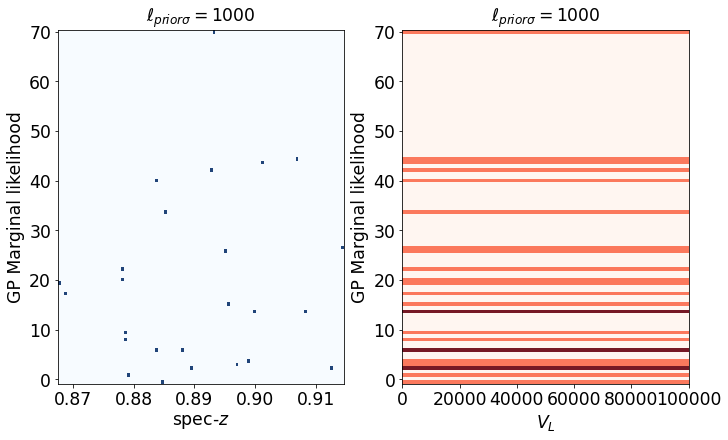

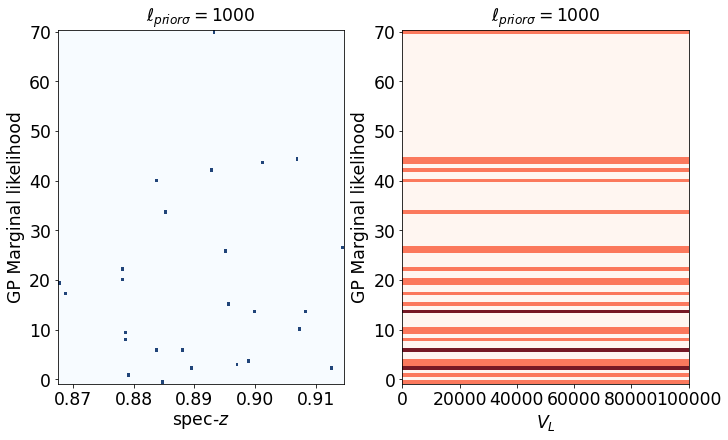

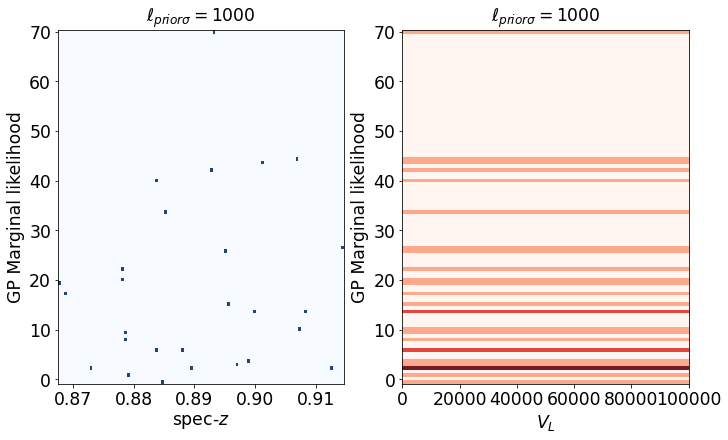

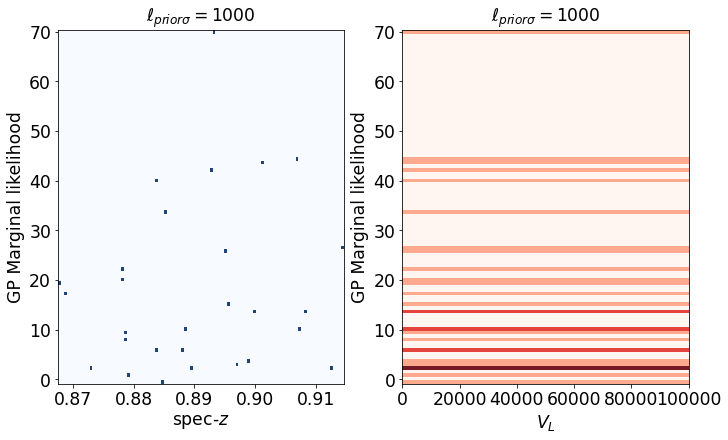

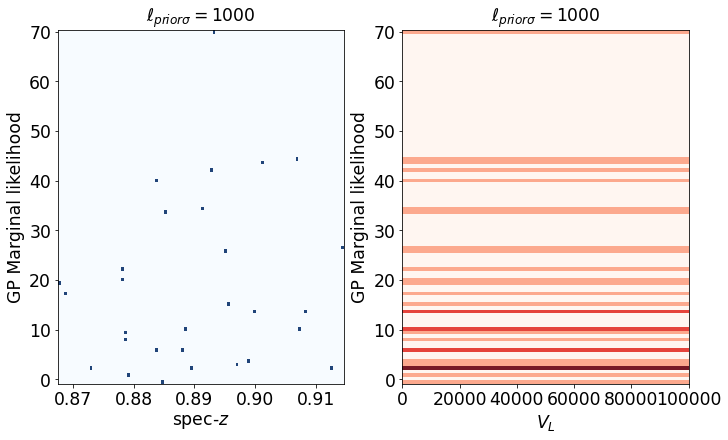

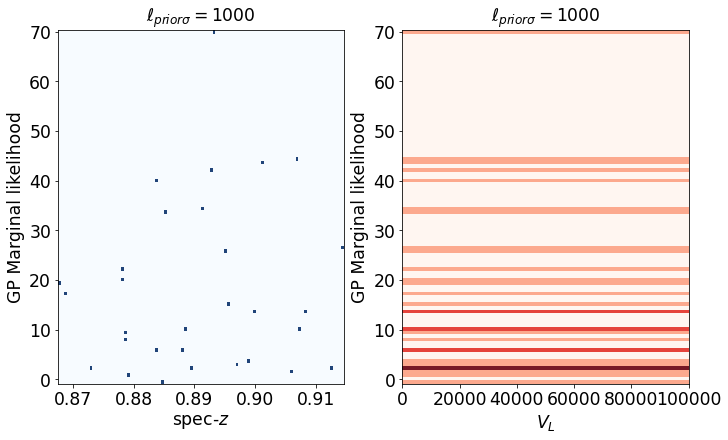

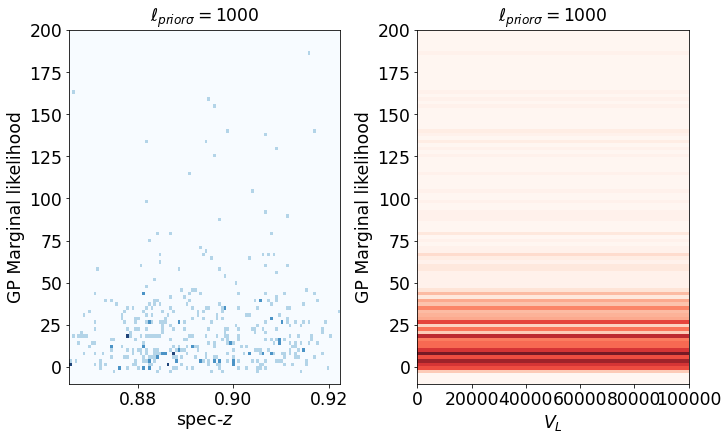

In [12]:
ellPriorSigmaList = np.logspace( 0, 6, 7 )
lenSigList = len(ellPriorSigmaList)
ellInd = -1

for ellPriorSigma in [1000]: #ellPriorSigmaList:
    print("ellPriorSigma = {}".format(ellPriorSigma))
    ellInd += 1
    alpha_C = 1e3
    alpha_L = 1e2
    V_C, V_L = 100000, 1.0
    allVc = []
    allZ = []
    allMargLike = []
    allAlphaC = []
    allAlphaL = []
    allVl = []
    gp = PhotozGP(
        f_mod,
        bandCoefAmplitudes, bandCoefPositions, bandCoefWidths,
        params['lines_pos'], params['lines_width'],
        V_C, V_L, alpha_C, alpha_L,
        redshiftGridGP, use_interpolators=True)
    print("Initialisation du GP pour var_C = {}, alpha_C = {}".format(gp.kernel.var_C, gp.kernel.alpha_C))

    for extraFracFluxError in [1e-2]:
        redshifts = np.zeros((numObjectsTraining, ))
        bestTypes = np.zeros((numObjectsTraining, ), dtype=int)
        ellMLs = np.zeros((numObjectsTraining, ))
        model_mean = np.zeros((numZ, numObjectsTraining, numBands))
        model_covar = np.zeros((numZ, numObjectsTraining, numBands))
        # params['training_extraFracFluxError'] = extraFracFluxError
        params['target_extraFracFluxError'] = extraFracFluxError

        loc = -1
        targetDataIter = getDataFromFile(params, 0, numObjectsTraining, prefix="target_", getXY=True)
        for z, normedRefFlux, bands, fluxes, fluxesVar, bCV, fCV, fvCV, X, Y, Yvar in targetDataIter:
            loc += 1
            redshifts[loc] = z
            # print( "z = {},\nbands = {},\nfluxes = {}".format(z, bands, fluxes) )

            themod = np.zeros((1, f_mod_grid.shape[1], bands.size))
            for it in range(f_mod_grid.shape[1]):
                for ib, band in enumerate(bands):
                    themod[0, it, ib] = np.interp(z, redshiftGrid, f_mod_grid[:, it, band])

            chi2_grid, theellMLs = scalefree_flux_likelihood(fluxes, fluxesVar, themod, returnChi2=True)

            bestTypes[loc] = np.argmin(chi2_grid)
            #distribué uniformément?
            ellMLs[loc] = theellMLs[0, bestTypes[loc]]
            #autour de 1e6 car facteur dans la génération des flux

            X[:, 2] = ellMLs[loc]
            for V_L in np.linspace( 0, 1e5, 300 ):
                gp.kernel.use_interpolators=False
                gp.kernel.var_L = V_L
                #gp.kernel.update_kernelparts(X)
                gp.setData(X, Y, Yvar, bestTypes[loc])
                marginalLikelihood = gp.margLike()
                allZ.append(z)
                allMargLike.append(marginalLikelihood)
                allVl.append(V_L)

            if loc < 30:
                ## Plot for this iteration on ellPriorSigma:
                print("Création des graphes Marglike=f(V_L) pour ellPriorSigma = {}".format(ellPriorSigma))
                alpha = 0.9
                s = 5
                fig, axs = plt.subplots(1, 2, constrained_layout=True)

                vs0 = axs[0].hist2d(allZ, allMargLike, bins=[100, 100], density=True, cmap="Blues", alpha=alpha)
                vs1 = axs[1].hist2d(allVl, allMargLike, bins=[50, 100], density=True, cmap="Reds", alpha=alpha)

                axs[0].set_xlabel('spec-$z$')
                axs[0].set_ylabel('GP Marginal likelihood')
                axs[1].set_xlabel('$V_L$')
                axs[1].set_ylabel('GP Marginal likelihood')

                axs[0].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))
                axs[1].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))

                fig.show()

    ## Plot for this iteration on ellPriorSigma:
    print("Création des graphes Marglike=f(V_L) pour ellPriorSigma = {}".format(ellPriorSigma))
    alpha = 0.9
    s = 5
    fig, axs = plt.subplots(1, 2, constrained_layout=True)

    vs0 = axs[0].hist2d(allZ, allMargLike, bins=[100, 100], range=[[np.min(allZ), np.max(allZ)], [-10, 200]], density=True, cmap="Blues", alpha=alpha)
    vs1 = axs[1].hist2d(allVl, allMargLike, bins=[50, 100], range=[[np.min(allVl), np.max(allVl)], [-10, 200]], density=True, cmap="Reds", alpha=alpha)

    axs[0].set_xlabel('spec-$z$')
    axs[0].set_ylabel('GP Marginal likelihood')
    axs[1].set_xlabel('$V_L$')
    axs[1].set_ylabel('GP Marginal likelihood')

    axs[0].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))
    axs[1].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))

    fig.show()
            
    if FLAG_DC2:
        fig.savefig( "VL_MargLike_z_v3_DESC_ellSigma-{}_target.png".format(ellPriorSigma) )
    else:
        fig.savefig( "VL_MargLike_z_v3_SIM_ellSigma-{}_target.png".format(ellPriorSigma) )

ellPriorSigma = 1000
Initialisation du GP pour var_C = 100000, alpha_C = 1000.0
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000


/tmp/ipykernel_4537/1367220932.py:83: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 

/tmp/ipykernel_4537/1367220932.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, constrained_layout=True)


Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = 1000


/tmp/ipykernel_4537/1367220932.py:102: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


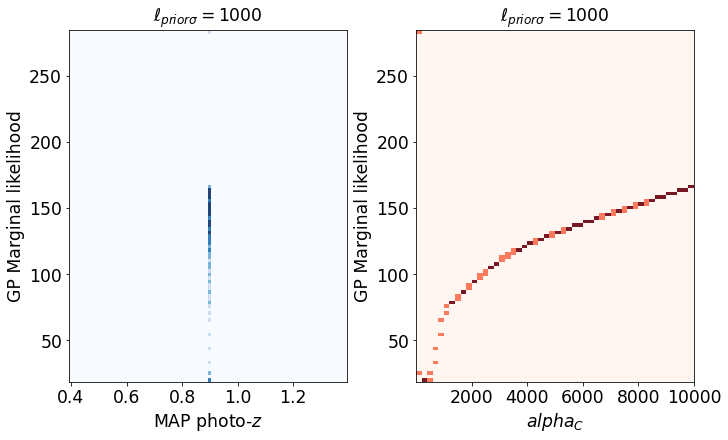

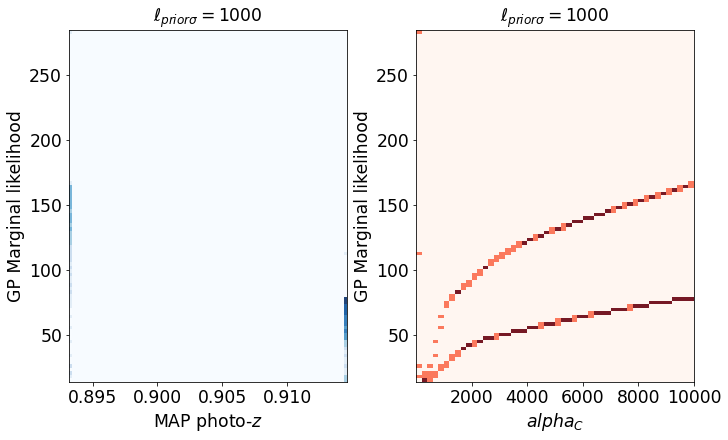

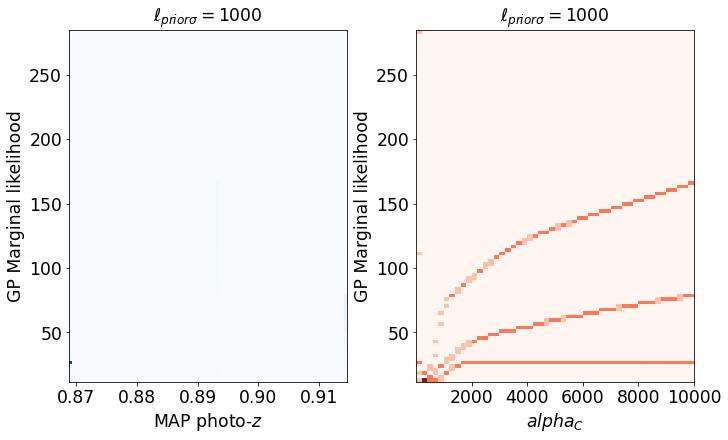

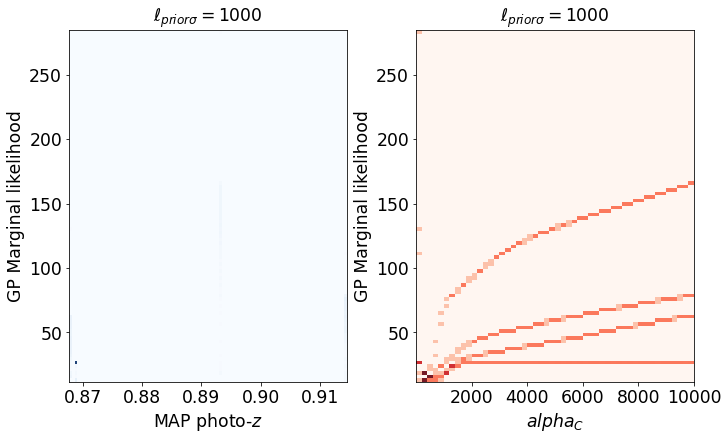

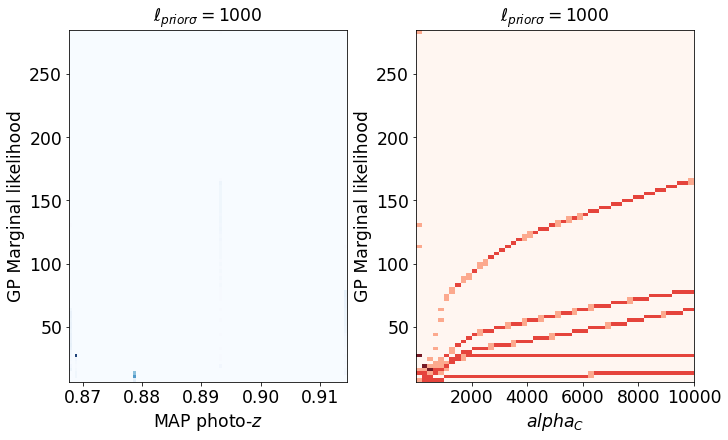

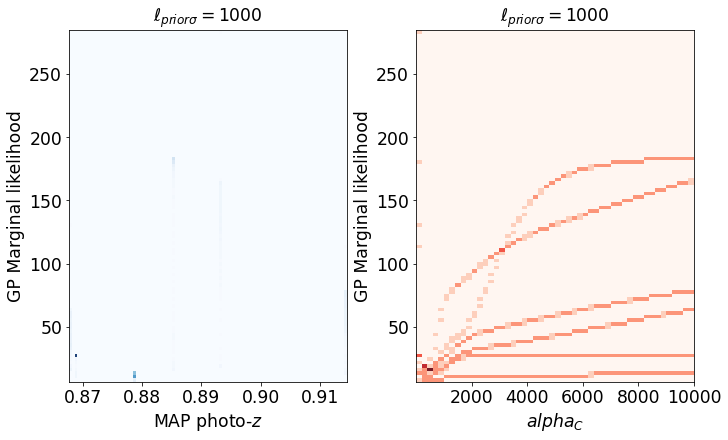

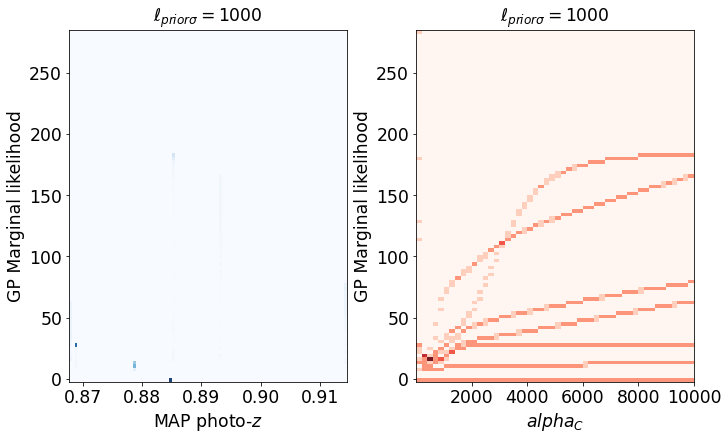

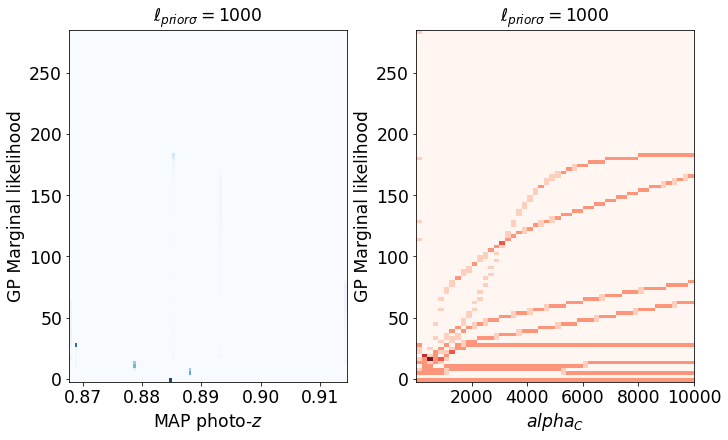

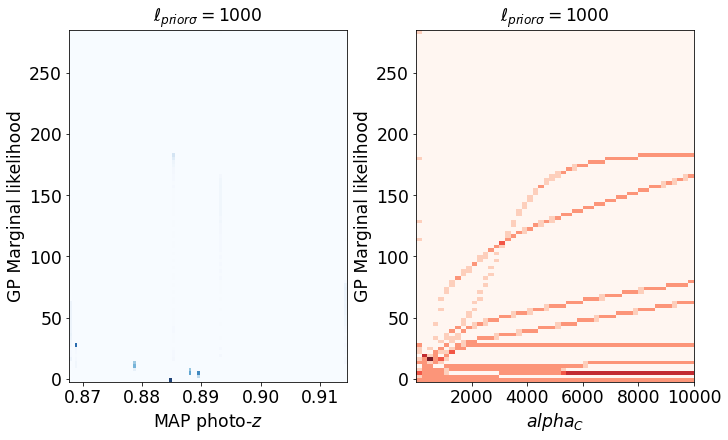

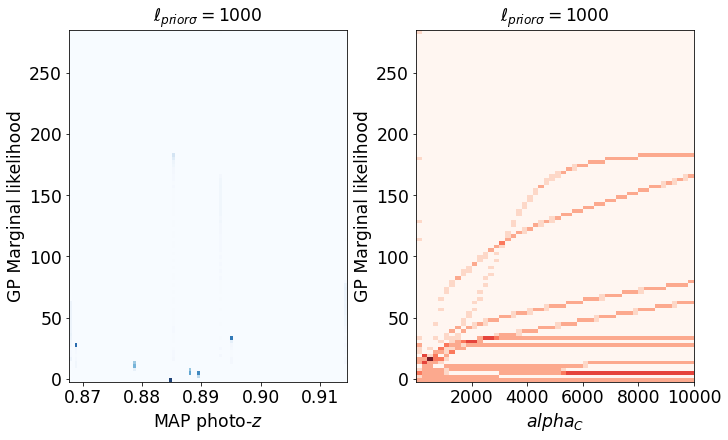

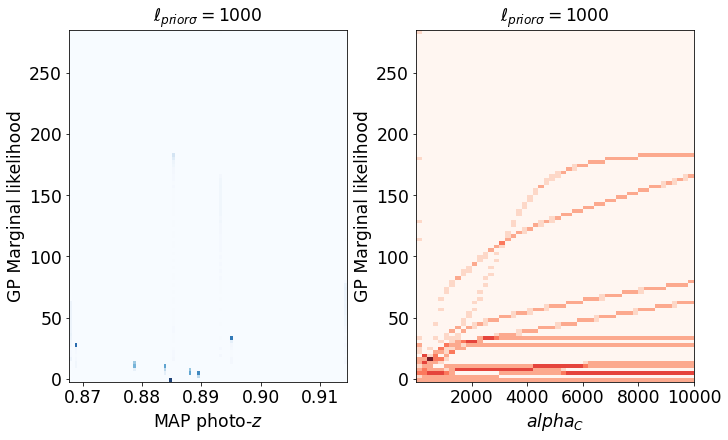

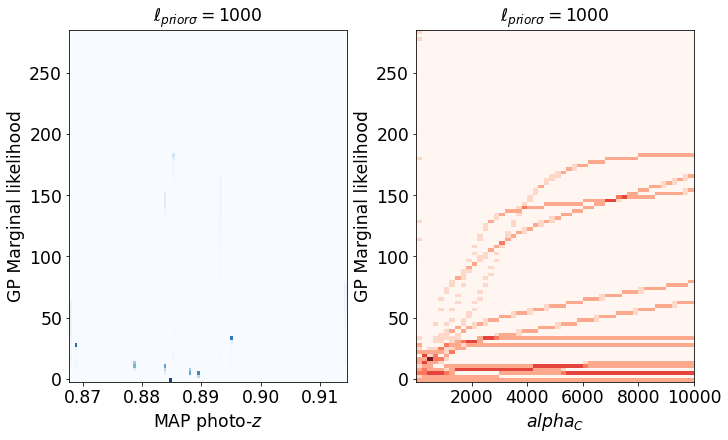

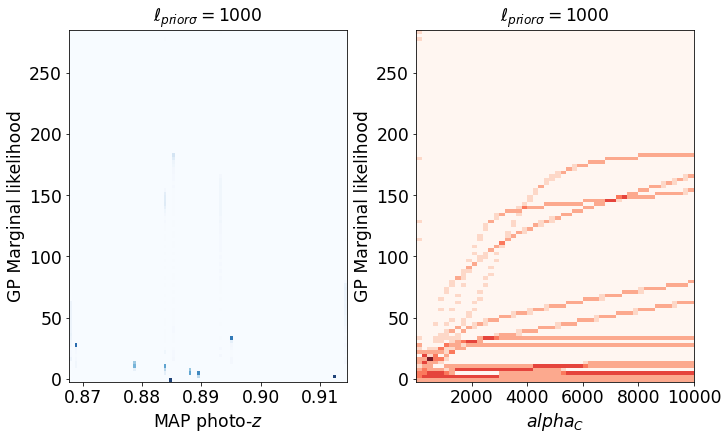

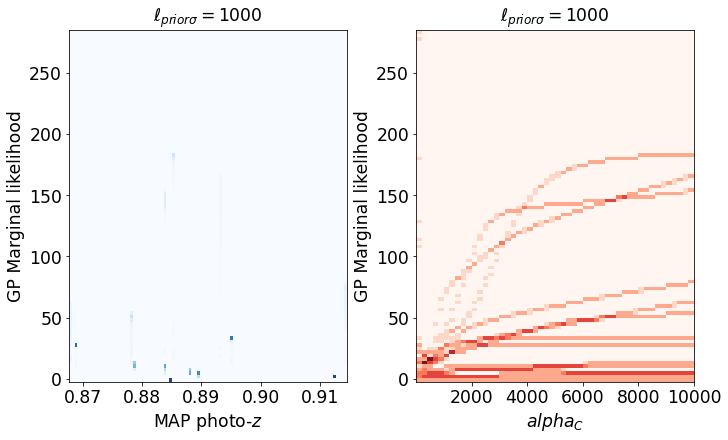

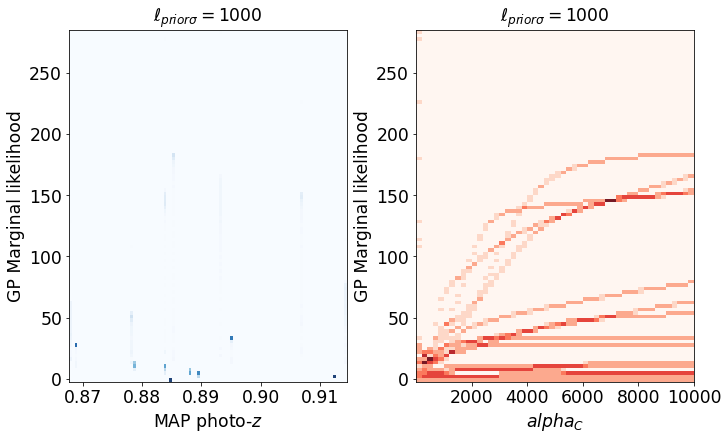

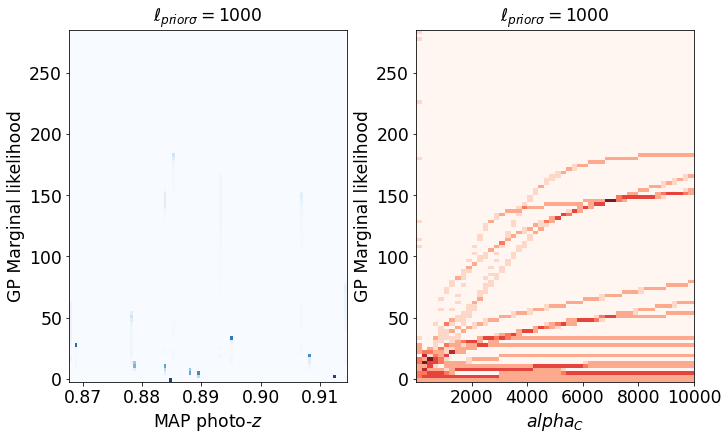

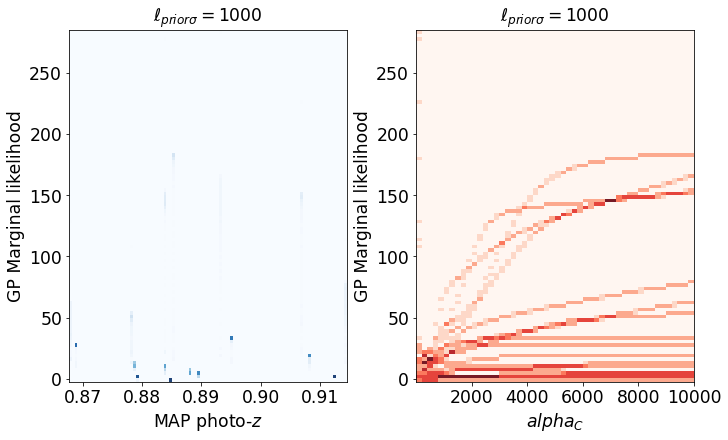

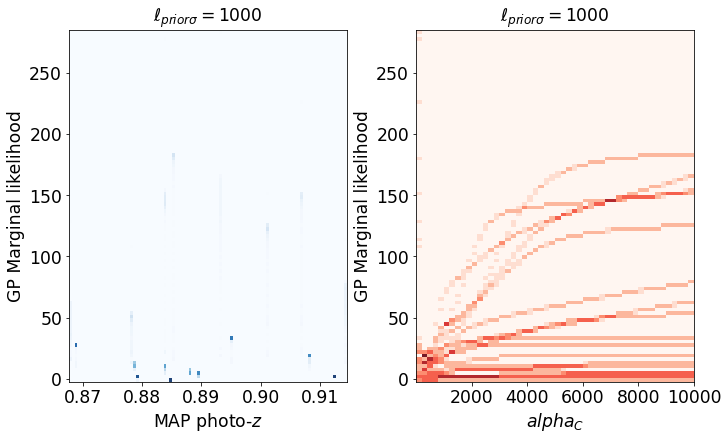

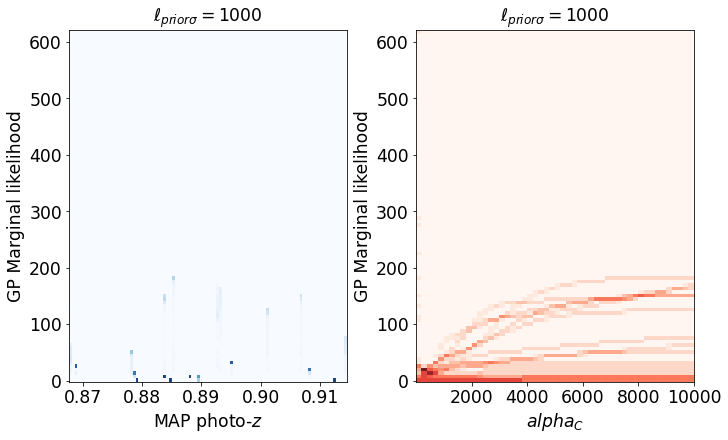

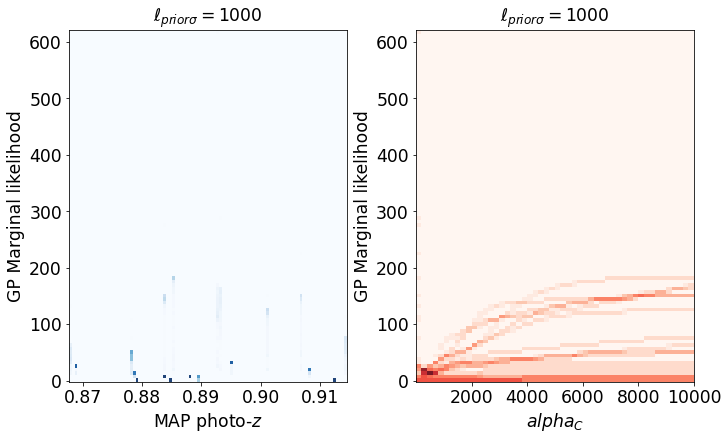

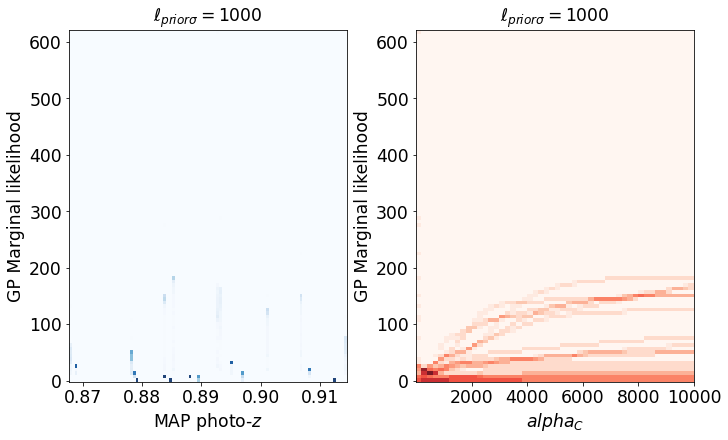

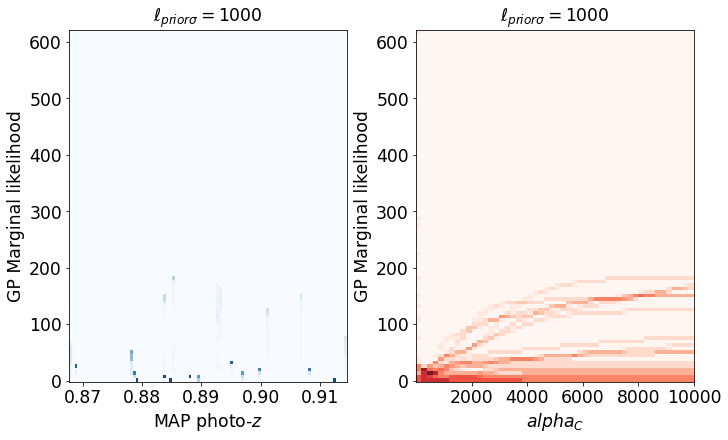

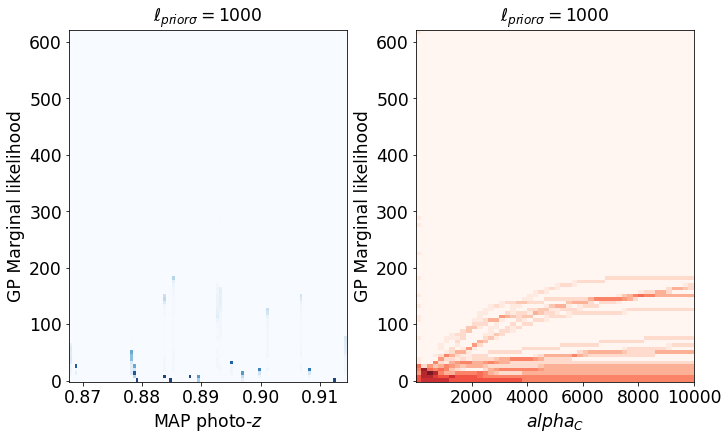

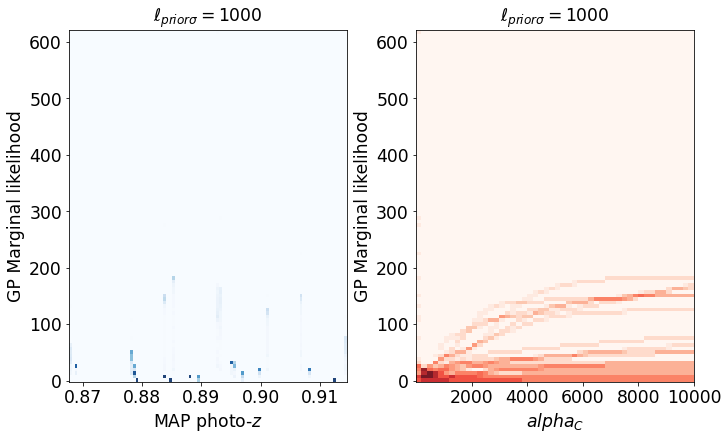

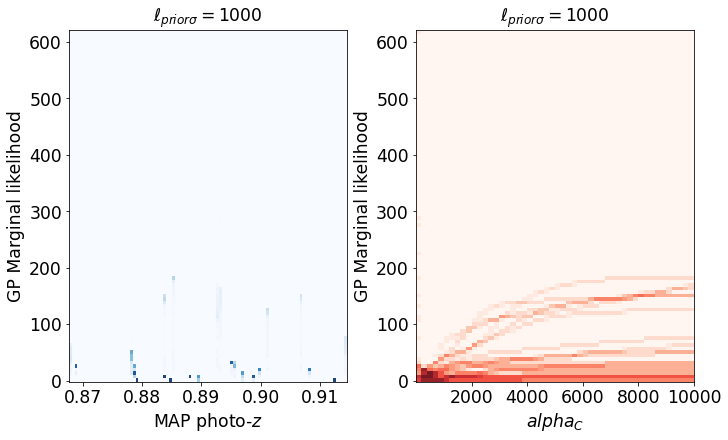

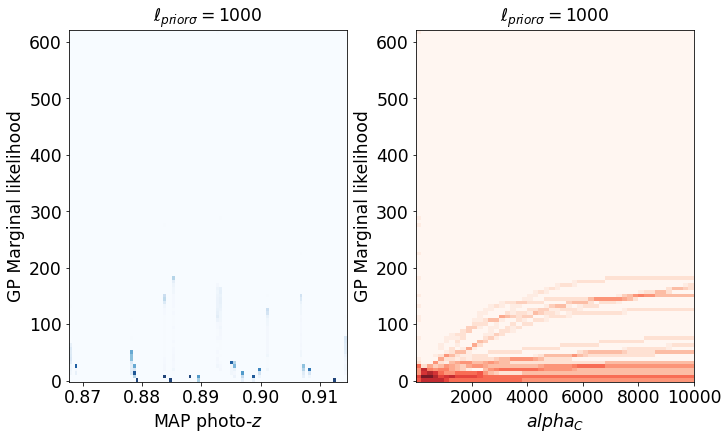

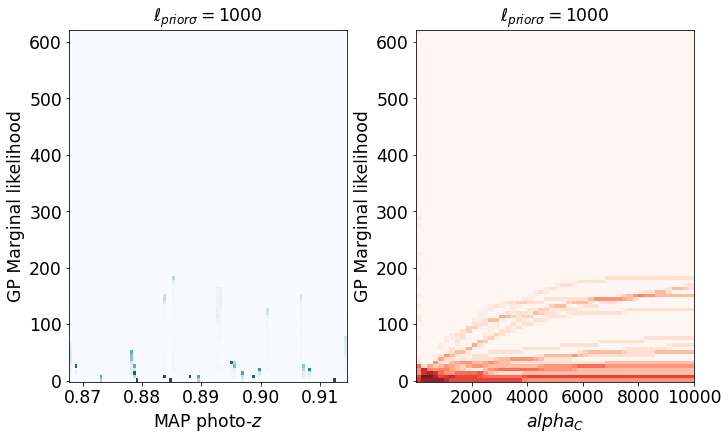

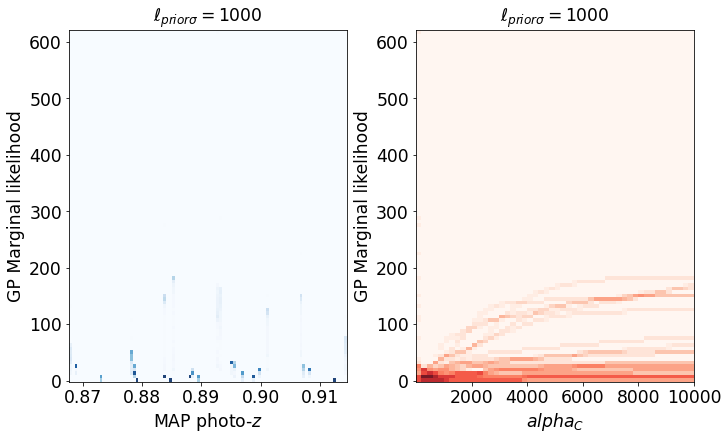

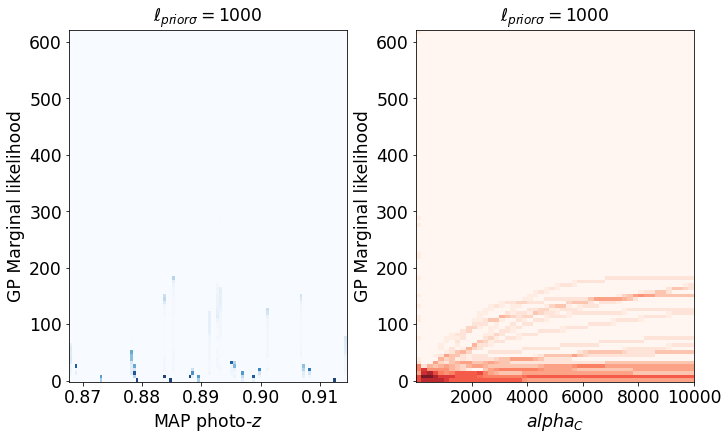

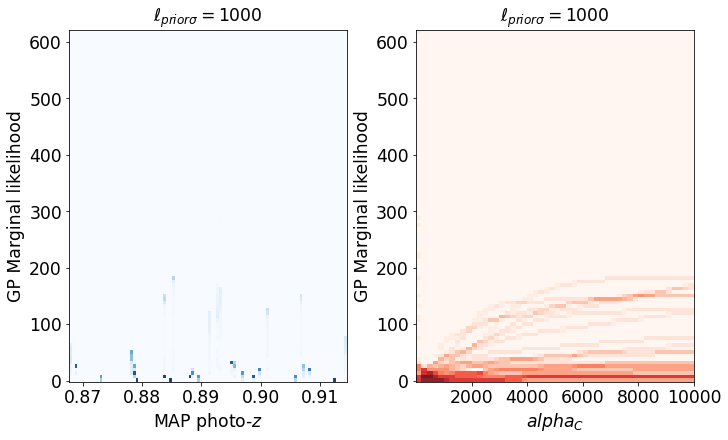

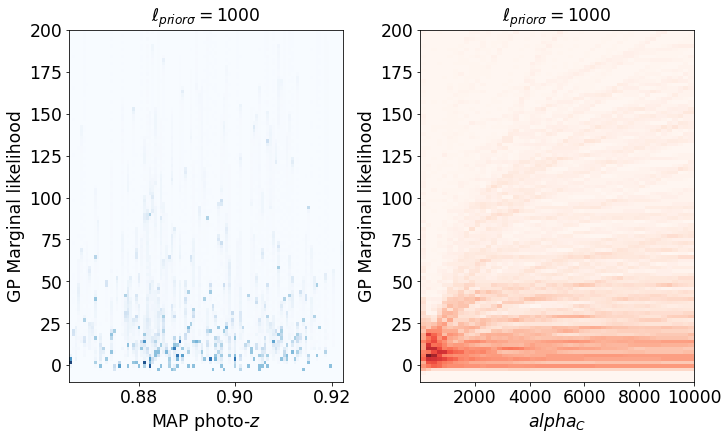

In [13]:
ellPriorSigmaList = np.logspace( 0, 6, 7 )
lenSigList = len(ellPriorSigmaList)
ellInd = -1

for ellPriorSigma in [1000]: #ellPriorSigmaList:
    print("ellPriorSigma = {}".format(ellPriorSigma))
    ellInd += 1
    alpha_C = 1e3
    alpha_L = 1e2
    V_C, V_L = 100000, 1.0
    allVc = []
    allZ = []
    allMargLike = []
    allAlphaC = []
    allAlphaL = []
    allVl = []
    gp = PhotozGP(
        f_mod,
        bandCoefAmplitudes, bandCoefPositions, bandCoefWidths,
        params['lines_pos'], params['lines_width'],
        V_C, V_L, alpha_C, alpha_L,
        redshiftGridGP, use_interpolators=True)
    print("Initialisation du GP pour var_C = {}, alpha_C = {}".format(gp.kernel.var_C, gp.kernel.alpha_C))

    for extraFracFluxError in [1e-2]:
        redshifts = np.zeros((numObjectsTraining, ))
        bestTypes = np.zeros((numObjectsTraining, ), dtype=int)
        ellMLs = np.zeros((numObjectsTraining, ))
        model_mean = np.zeros((numZ, numObjectsTraining, numBands))
        model_covar = np.zeros((numZ, numObjectsTraining, numBands))
        # params['training_extraFracFluxError'] = extraFracFluxError
        params['target_extraFracFluxError'] = extraFracFluxError

        loc = -1
        targetDataIter = getDataFromFile(params, 0, numObjectsTraining, prefix="target_", getXY=True)
        for z, normedRefFlux, bands, fluxes, fluxesVar, bCV, fCV, fvCV, X, Y, Yvar in targetDataIter:
            loc += 1
            redshifts[loc] = z
            # print( "z = {},\nbands = {},\nfluxes = {}".format(z, bands, fluxes) )
            
            themod = np.zeros((1, f_mod_grid.shape[1], bands.size))
            for it in range(f_mod_grid.shape[1]):
                for ib, band in enumerate(bands):
                    themod[0, it, ib] = np.interp(z, redshiftGrid, f_mod_grid[:, it, band])
            
            chi2_grid, theellMLs = scalefree_flux_likelihood(fluxes, fluxesVar, themod, returnChi2=True)
            
            bestTypes[loc] = np.argmin(chi2_grid)
            #distribué uniformément?
            ellMLs[loc] = theellMLs[0, bestTypes[loc]]
            #autour de 1e6 car facteur dans la génération des flux
            
            X[:, 2] = ellMLs[loc]
            
            for alpha_C in np.linspace( 0.1, 1e4, 100 ):
                gp.kernel.use_interpolators=False
                gp.kernel.alpha_C = alpha_C
                #gp.kernel.update_kernelparts(X)
                gp.setData(X, Y, Yvar, bestTypes[loc])
                marginalLikelihood = gp.margLike()
                allZ.append(z)
                allMargLike.append(marginalLikelihood)
                allAlphaC.append(alpha_C)

            if loc < 30:
                ## Plot for this iteration on ellPriorSigma:
                print("Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = {}".format(ellPriorSigma))
                alpha = 0.9
                s = 5
                fig, axs = plt.subplots(1, 2, constrained_layout=True)

                vs0 = axs[0].hist2d(allZ, allMargLike, bins=[100, 100], density=True, cmap="Blues", alpha=alpha)
                vs1 = axs[1].hist2d(allAlphaC, allMargLike, bins=[50, 100], density=True, cmap="Reds", alpha=alpha)

                axs[0].set_xlabel('MAP photo-$z$')
                axs[0].set_ylabel('GP Marginal likelihood')
                axs[1].set_xlabel('$alpha_C$')
                axs[1].set_ylabel('GP Marginal likelihood')

                axs[0].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))
                axs[1].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))

                fig.show()

    ## Plot for this iteration on ellPriorSigma:
    print("Création des graphes Marglike=f(alpha_C) pour ellPriorSigma = {}".format(ellPriorSigma))
    alpha = 0.9
    s = 5
    fig, axs = plt.subplots(1, 2, constrained_layout=True)

    vs0 = axs[0].hist2d(allZ, allMargLike, bins=[100, 100], range=[[np.min(allZ), np.max(allZ)], [-10, 200]], density=True, cmap="Blues", alpha=alpha)
    vs1 = axs[1].hist2d(allAlphaC, allMargLike, bins=[50, 100], range=[[np.min(allAlphaC), np.max(allAlphaC)], [-10, 200]], density=True, cmap="Reds", alpha=alpha)

    axs[0].set_xlabel('MAP photo-$z$')
    axs[0].set_ylabel('GP Marginal likelihood')
    axs[1].set_xlabel('$alpha_C$')
    axs[1].set_ylabel('GP Marginal likelihood')

    axs[0].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))
    axs[1].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))

    fig.show()

    if FLAG_DC2:
        fig.savefig( "alphaC_MargLike_z_v3_DESC_ellSigma-{}_target.png".format(ellPriorSigma) )
    else:
        fig.savefig( "alphaC_MargLike_z_v3_SIM_ellSigma-{}_target.png".format(ellPriorSigma) )

ellPriorSigma = 1000
Initialisation du GP pour var_C = 100000, alpha_C = 1000.0
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000


/tmp/ipykernel_4537/1615191597.py:83: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 

/tmp/ipykernel_4537/1615191597.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, constrained_layout=True)


Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000
Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = 1000


/tmp/ipykernel_4537/1615191597.py:102: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


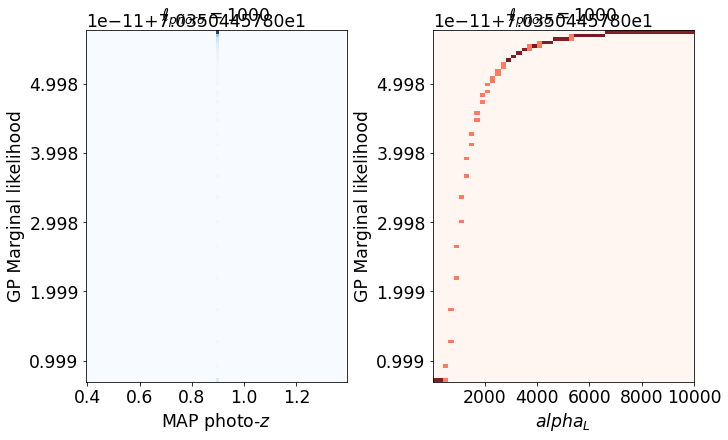

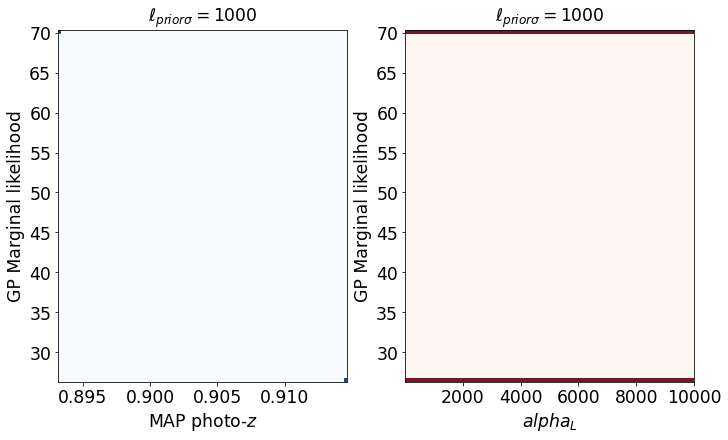

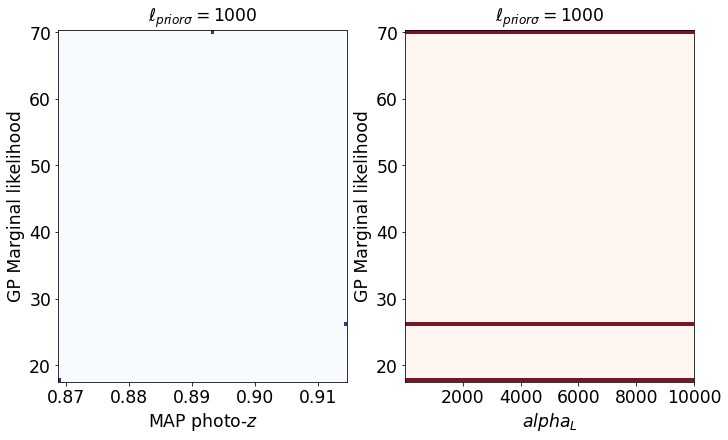

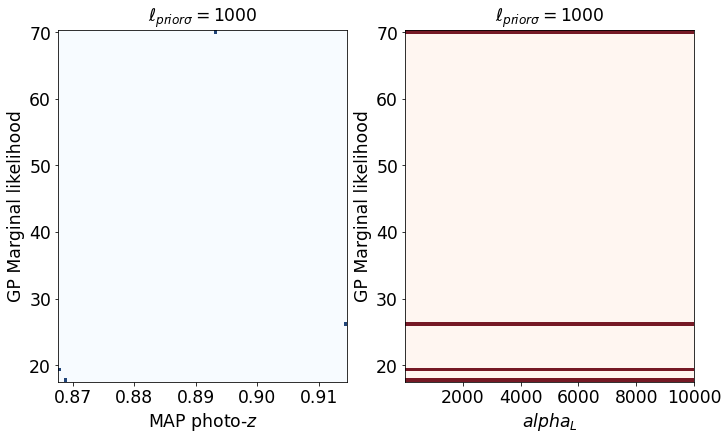

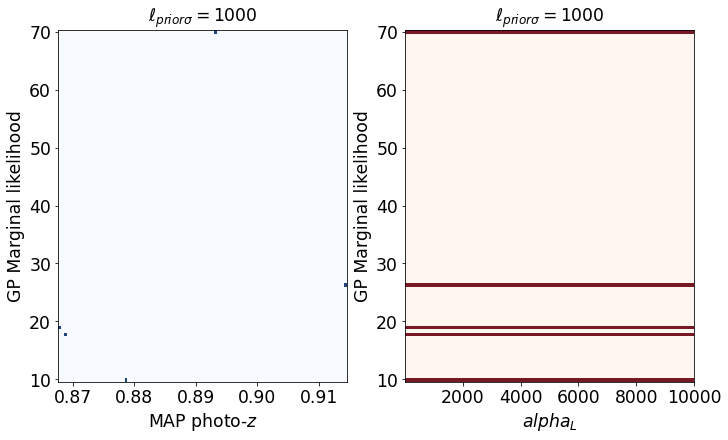

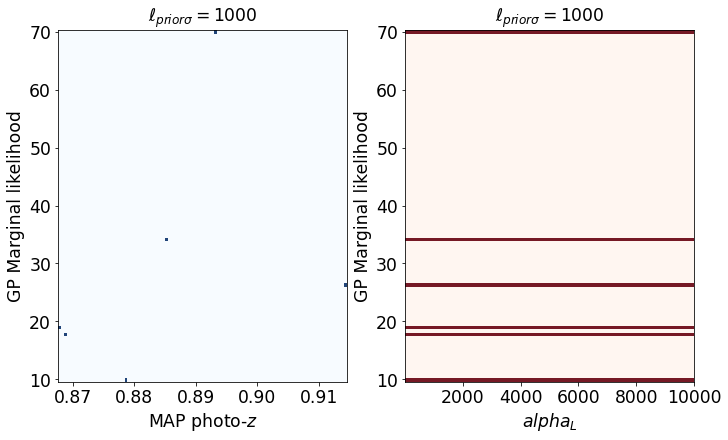

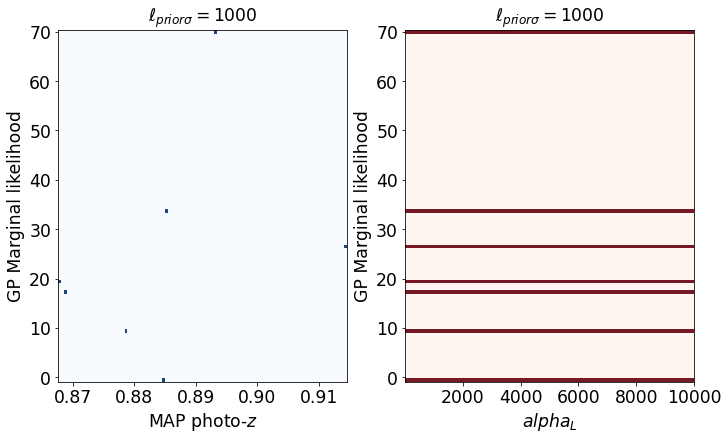

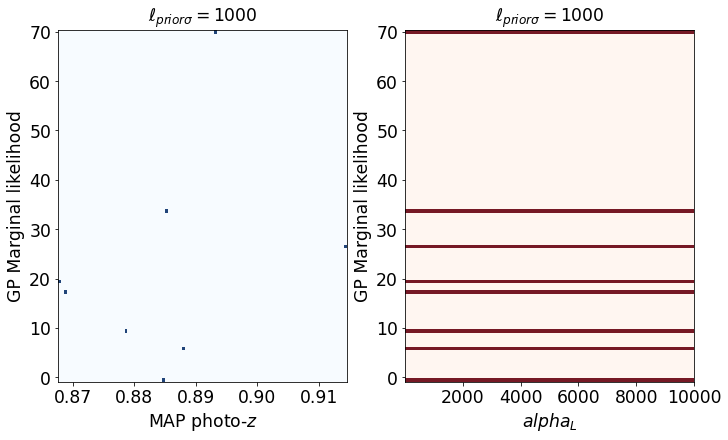

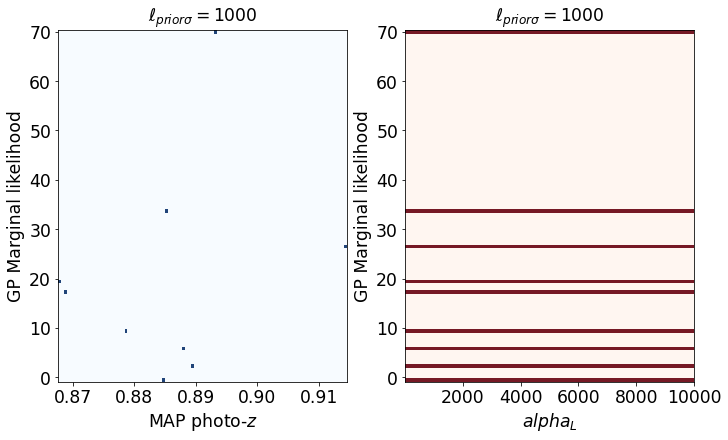

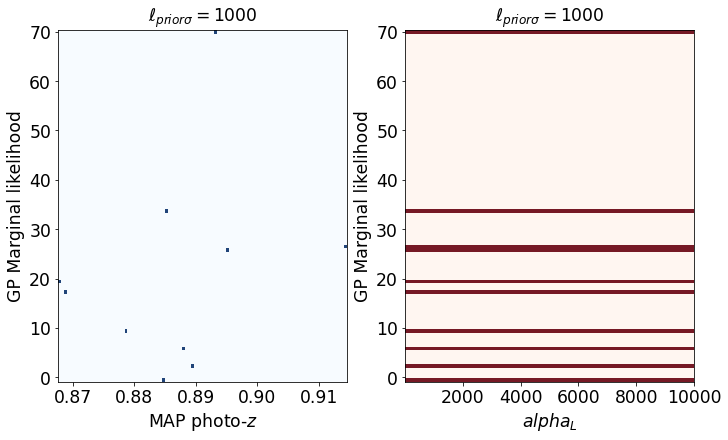

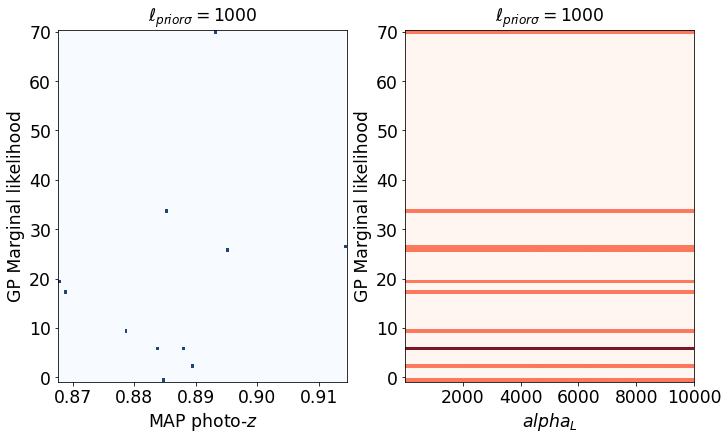

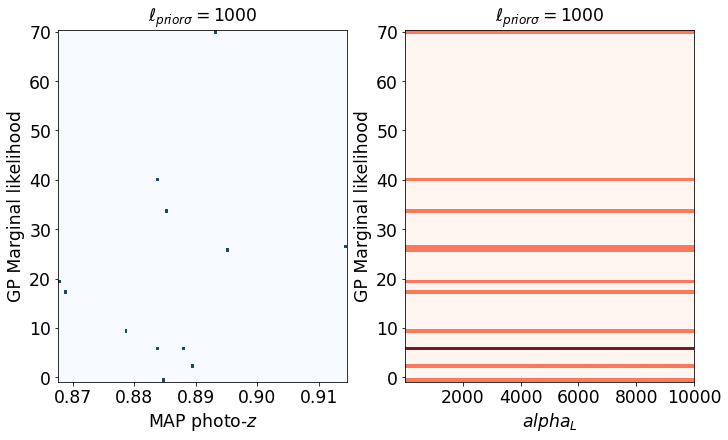

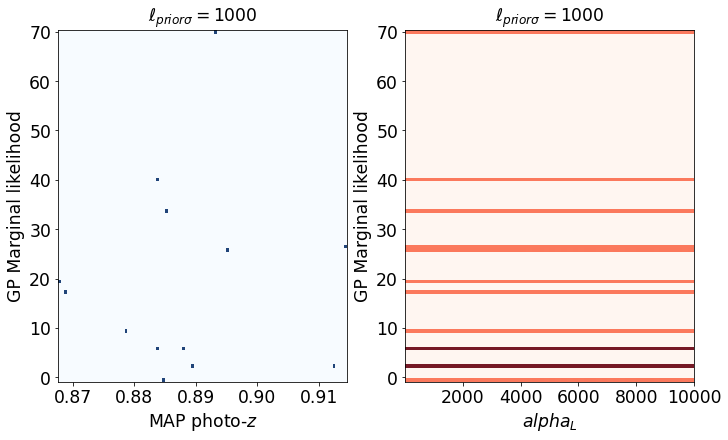

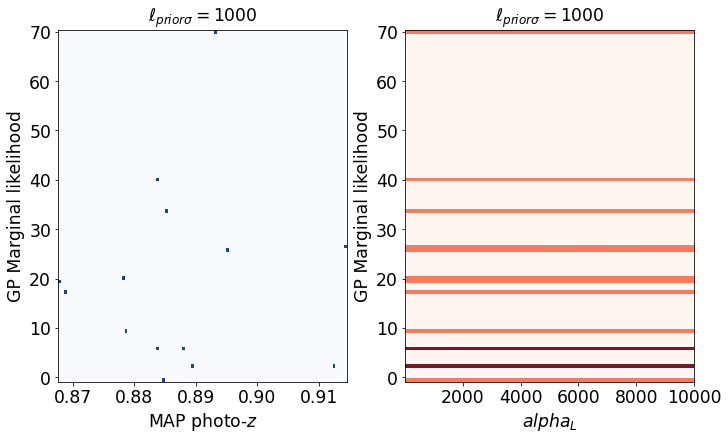

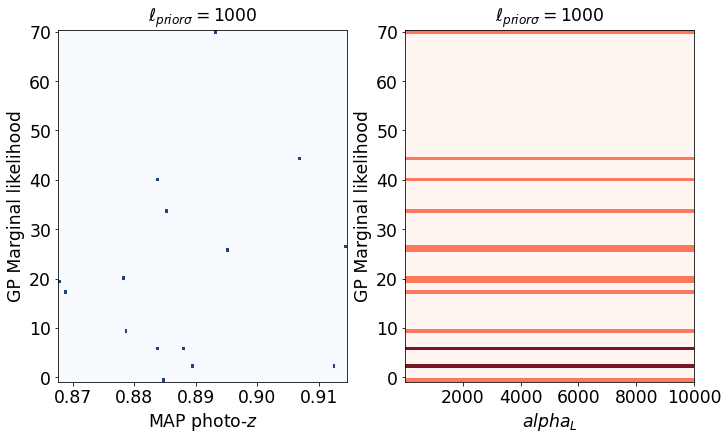

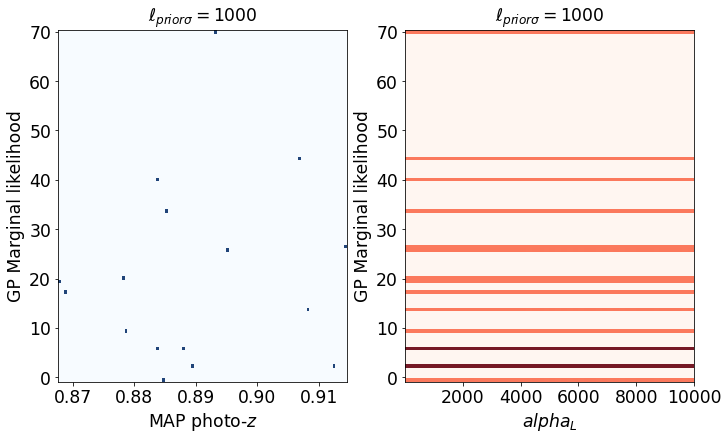

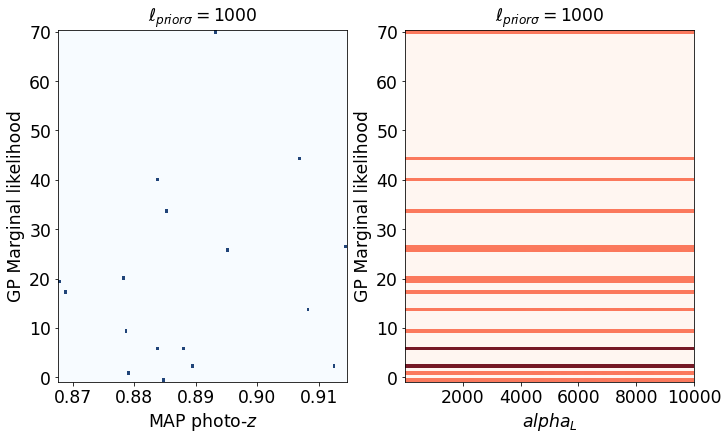

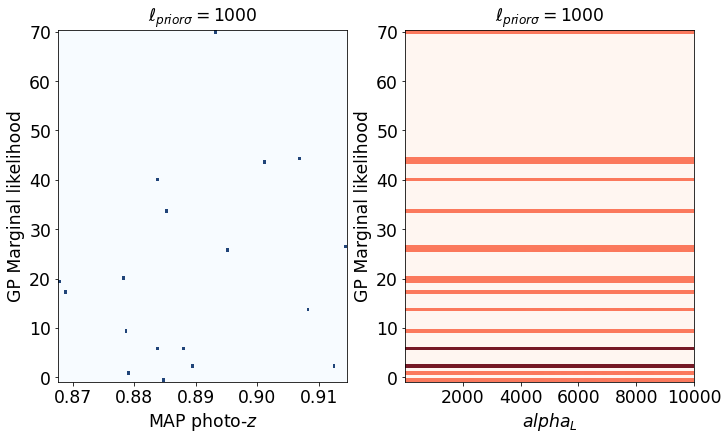

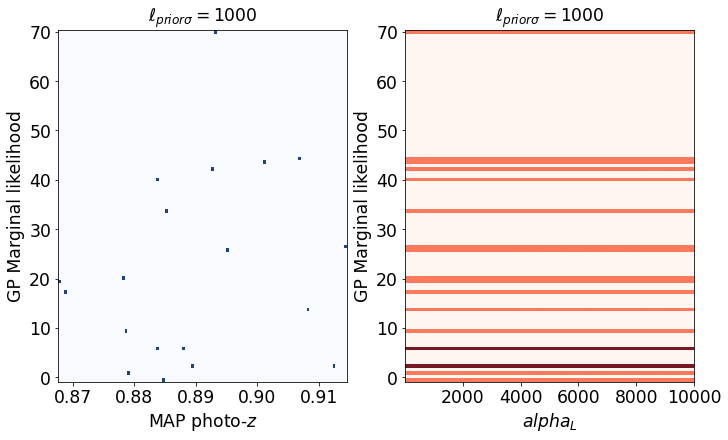

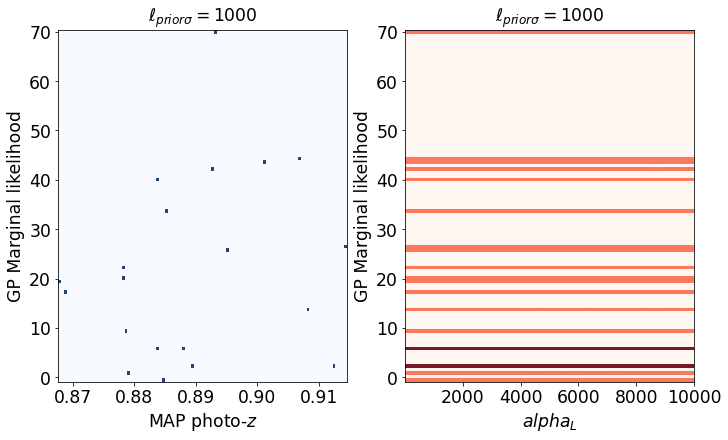

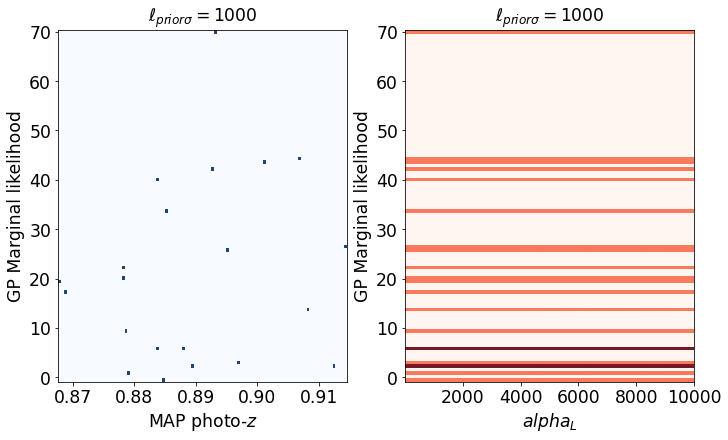

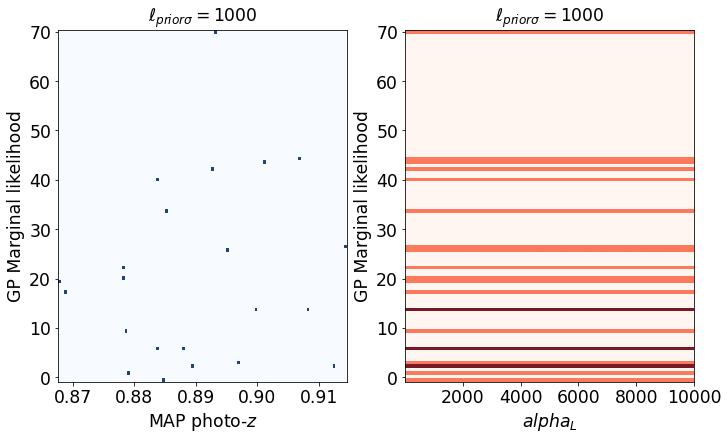

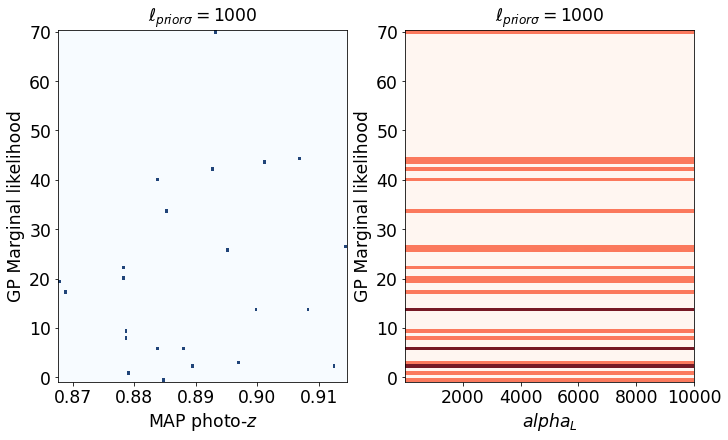

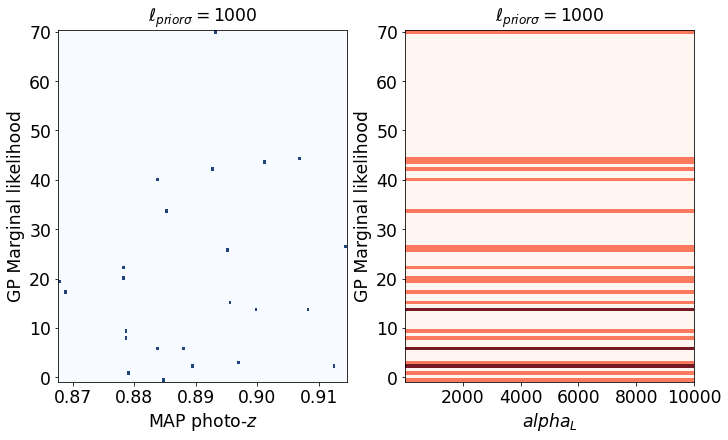

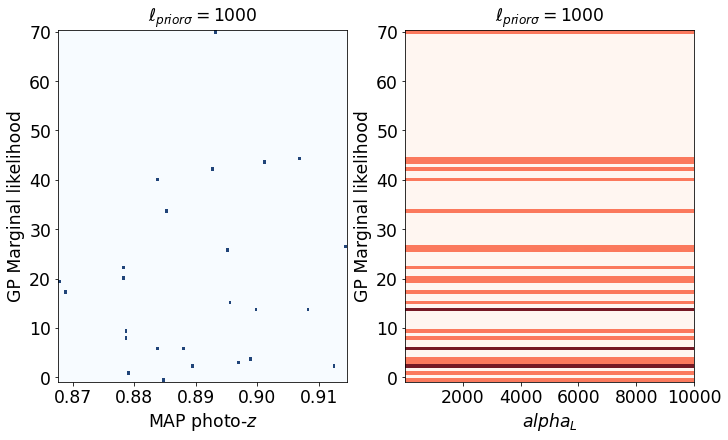

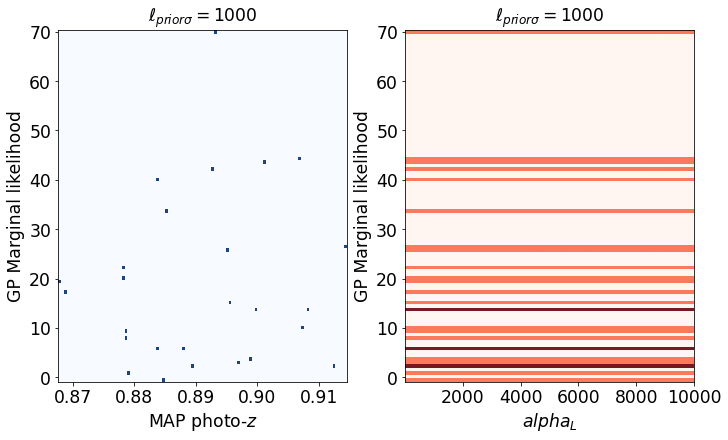

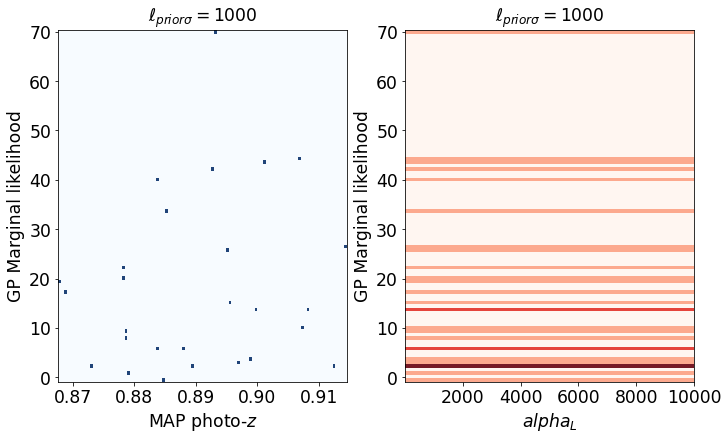

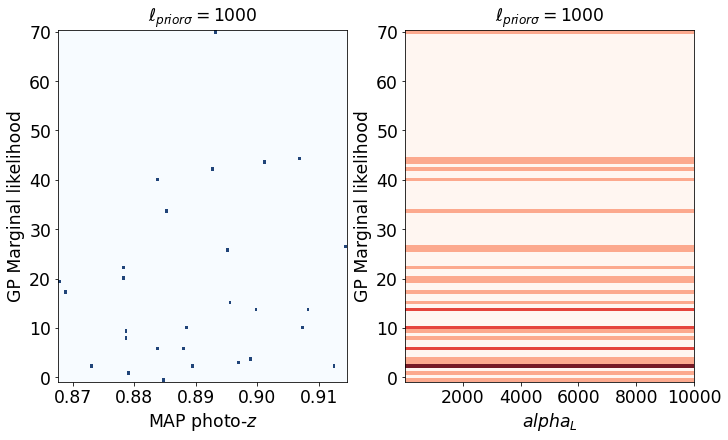

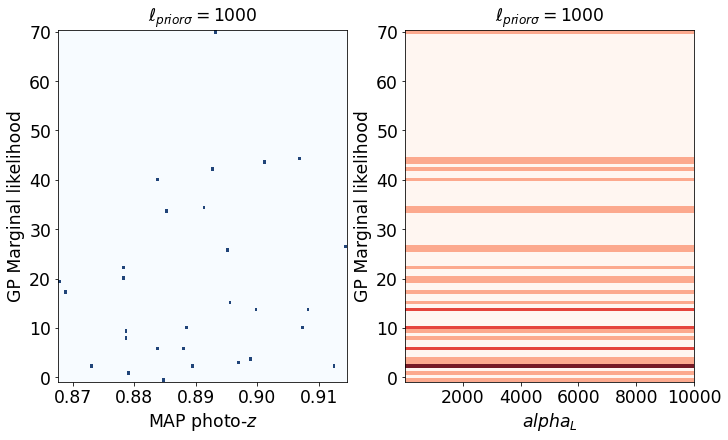

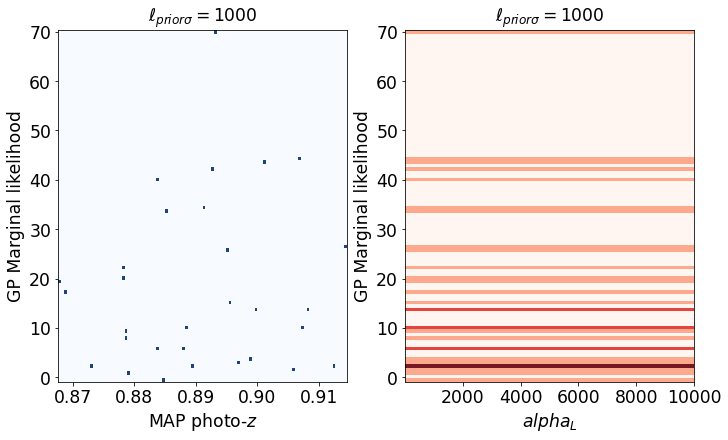

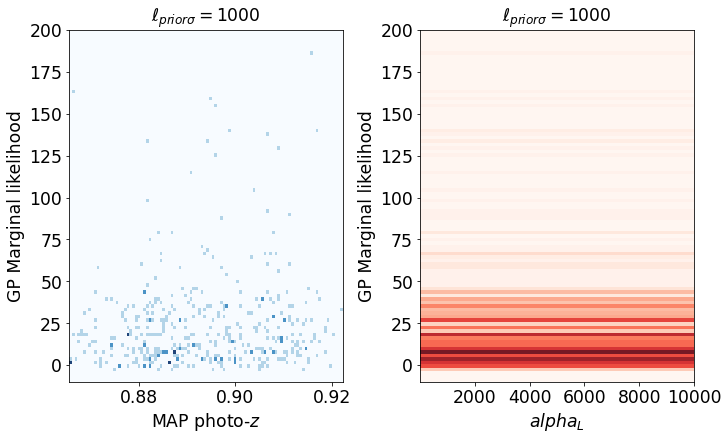

In [14]:
ellPriorSigmaList = np.logspace( 0, 6, 7 )
lenSigList = len(ellPriorSigmaList)
ellInd = -1

for ellPriorSigma in [1000]: #ellPriorSigmaList:
    print("ellPriorSigma = {}".format(ellPriorSigma))
    ellInd += 1
    alpha_C = 1e3
    alpha_L = 1e2
    V_C, V_L = 100000, 1.0
    allVc = []
    allZ = []
    allMargLike = []
    allAlphaC = []
    allAlphaL = []
    allVl = []
    gp = PhotozGP(
        f_mod,
        bandCoefAmplitudes, bandCoefPositions, bandCoefWidths,
        params['lines_pos'], params['lines_width'],
        V_C, V_L, alpha_C, alpha_L,
        redshiftGridGP, use_interpolators=True)
    print("Initialisation du GP pour var_C = {}, alpha_C = {}".format(gp.kernel.var_C, gp.kernel.alpha_C))

    for extraFracFluxError in [1e-2]:
        redshifts = np.zeros((numObjectsTraining, ))
        bestTypes = np.zeros((numObjectsTraining, ), dtype=int)
        ellMLs = np.zeros((numObjectsTraining, ))
        model_mean = np.zeros((numZ, numObjectsTraining, numBands))
        model_covar = np.zeros((numZ, numObjectsTraining, numBands))
        # params['training_extraFracFluxError'] = extraFracFluxError
        params['target_extraFracFluxError'] = extraFracFluxError

        loc = -1
        targetDataIter = getDataFromFile(params, 0, numObjectsTraining, prefix="target_", getXY=True)
        for z, normedRefFlux, bands, fluxes, fluxesVar, bCV, fCV, fvCV, X, Y, Yvar in targetDataIter:
            loc += 1
            redshifts[loc] = z
            # print( "z = {},\nbands = {},\nfluxes = {}".format(z, bands, fluxes) )
            
            themod = np.zeros((1, f_mod_grid.shape[1], bands.size))
            for it in range(f_mod_grid.shape[1]):
                for ib, band in enumerate(bands):
                    themod[0, it, ib] = np.interp(z, redshiftGrid, f_mod_grid[:, it, band])
            
            chi2_grid, theellMLs = scalefree_flux_likelihood(fluxes, fluxesVar, themod, returnChi2=True)
            
            bestTypes[loc] = np.argmin(chi2_grid)
            #distribué uniformément?
            ellMLs[loc] = theellMLs[0, bestTypes[loc]]
            #autour de 1e6 car facteur dans la génération des flux
            
            X[:, 2] = ellMLs[loc]
            
            for alpha_L in np.linspace( 0.1, 1e4, 100 ):
                gp.kernel.use_interpolators=False
                gp.kernel.alpha_L = alpha_L
                #gp.kernel.update_kernelparts(X)
                gp.setData(X, Y, Yvar, bestTypes[loc])
                marginalLikelihood = gp.margLike()
                allZ.append(z)
                allMargLike.append(marginalLikelihood)
                allAlphaL.append(alpha_L)

            if loc < 30:
                ## Plot for this iteration on ellPriorSigma:
                print("Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = {}".format(ellPriorSigma))
                alpha = 0.9
                s = 5
                fig, axs = plt.subplots(1, 2, constrained_layout=True)

                vs0 = axs[0].hist2d(allZ, allMargLike, bins=[100, 100], density=True, cmap="Blues", alpha=alpha)
                vs1 = axs[1].hist2d(allAlphaL, allMargLike, bins=[50, 100], density=True, cmap="Reds", alpha=alpha)

                axs[0].set_xlabel('MAP photo-$z$')
                axs[0].set_ylabel('GP Marginal likelihood')
                axs[1].set_xlabel('$alpha_L$')
                axs[1].set_ylabel('GP Marginal likelihood')

                axs[0].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))
                axs[1].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))

                fig.show()

    ## Plot for this iteration on ellPriorSigma:
    print("Création des graphes Marglike=f(alpha_L) pour ellPriorSigma = {}".format(ellPriorSigma))
    alpha = 0.9
    s = 5
    fig, axs = plt.subplots(1, 2, constrained_layout=True)

    vs0 = axs[0].hist2d(allZ, allMargLike, bins=[100, 100], range=[[np.min(allZ), np.max(allZ)], [-10, 200]], density=True, cmap="Blues", alpha=alpha)
    vs1 = axs[1].hist2d(allAlphaL, allMargLike, bins=[50, 100], range=[[np.min(allAlphaL), np.max(allAlphaL)], [-10, 200]], density=True, cmap="Reds", alpha=alpha)

    axs[0].set_xlabel('MAP photo-$z$')
    axs[0].set_ylabel('GP Marginal likelihood')
    axs[1].set_xlabel('$alpha_L$')
    axs[1].set_ylabel('GP Marginal likelihood')

    axs[0].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))
    axs[1].set_title('$\ell_{prior \sigma} = $'+'{}'.format(ellPriorSigma))

    fig.show()

    if FLAG_DC2:
        fig.savefig( "alphaL_MargLike_z_v3_DESC_ellSigma-{}_target.png".format(ellPriorSigma) )
    else:
        fig.savefig( "alphaL_MargLike_z_v3_SIM_ellSigma-{}_target.png".format(ellPriorSigma) )